# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity: (1)$\frac{\partial C_0}{\partial t}$ will first increase at small $t$ and then decrease at larger $t$; (2) Depending on the sign of $r+\sigma^2/2$, it will either first decrease to negative values and then increase back to zero ($r+\sigma^2/2<0$) or directly decreases to zero ($r+\sigma^2/2\geq 0$). Details can be found below*
- *Call Option – Spot Price Sensitivity: The rate of change will first increase and then decrease with $S_{0}$. The turning point or the maximum of the rate of change along the $S_{0}$ axis at a given $t$ is given by $S_{0}^{TP}=Ke^{(r+\sigma^2/2)t}$. Details can be found below.*  
- *Put Option – Time Sensitivity:*  (1) When $r=0$, the behavior is same to that of call options. (2)When $r>0$, the rate of change will first increase and then decrease to negative values and then increase back to zero. While when $r<0$, the rate of change will first increase and then decrease and then increase to infinity.
- *Put Option – Spot Price Sensitivity: Same to that of the call options*  

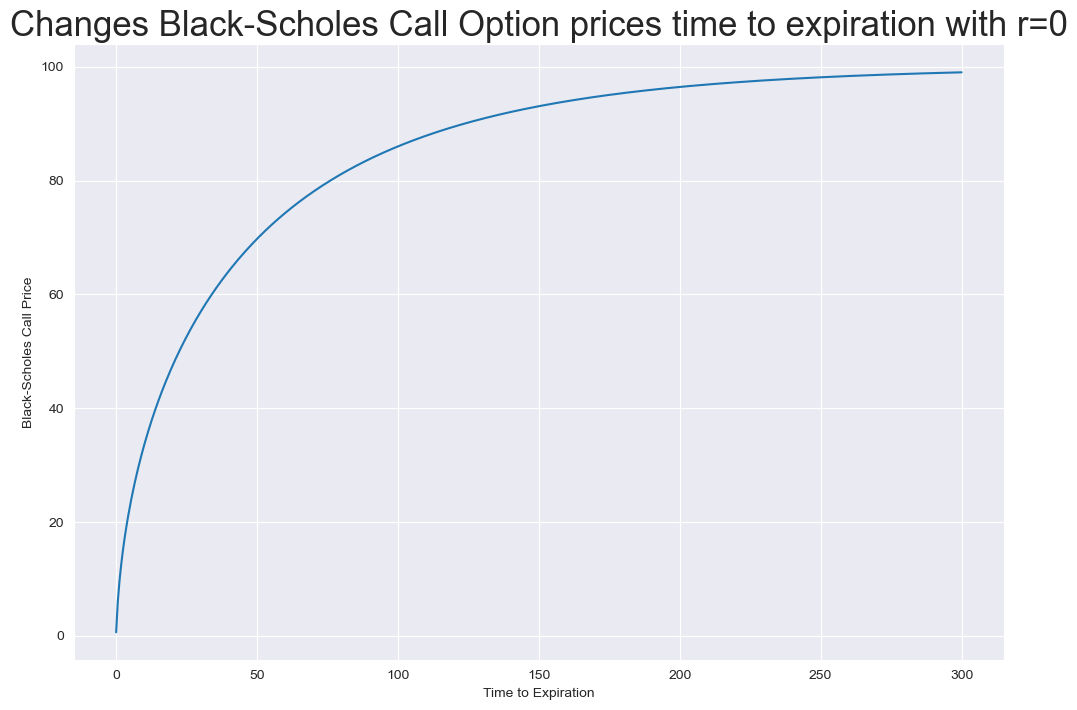

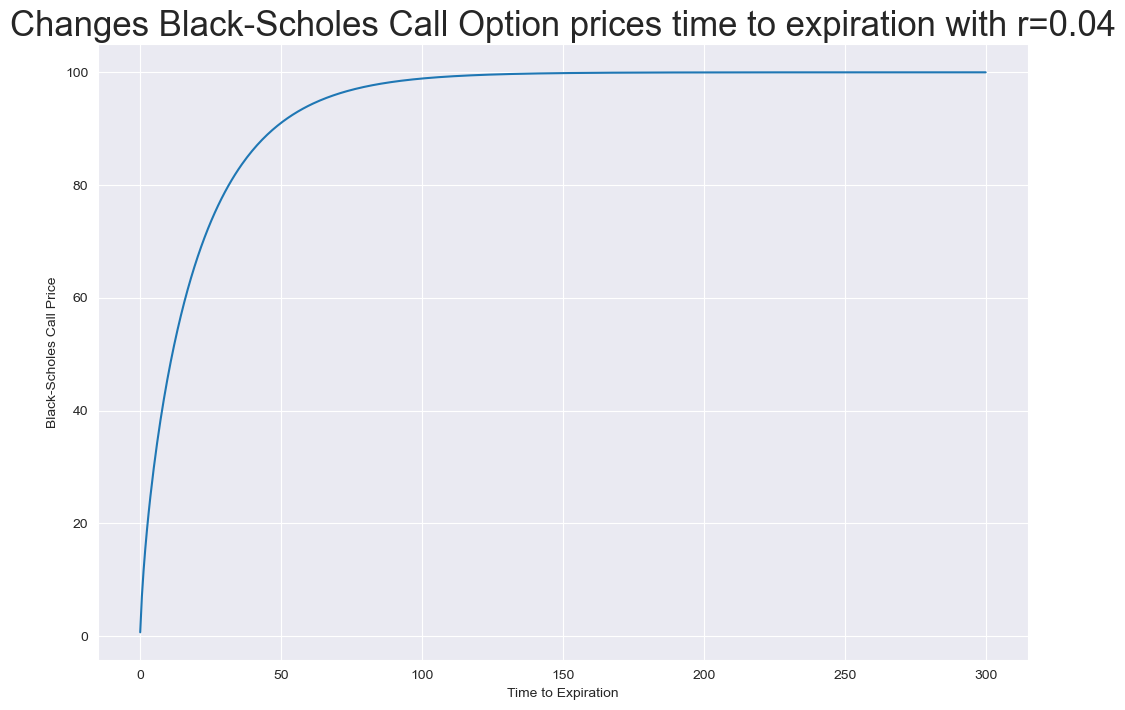

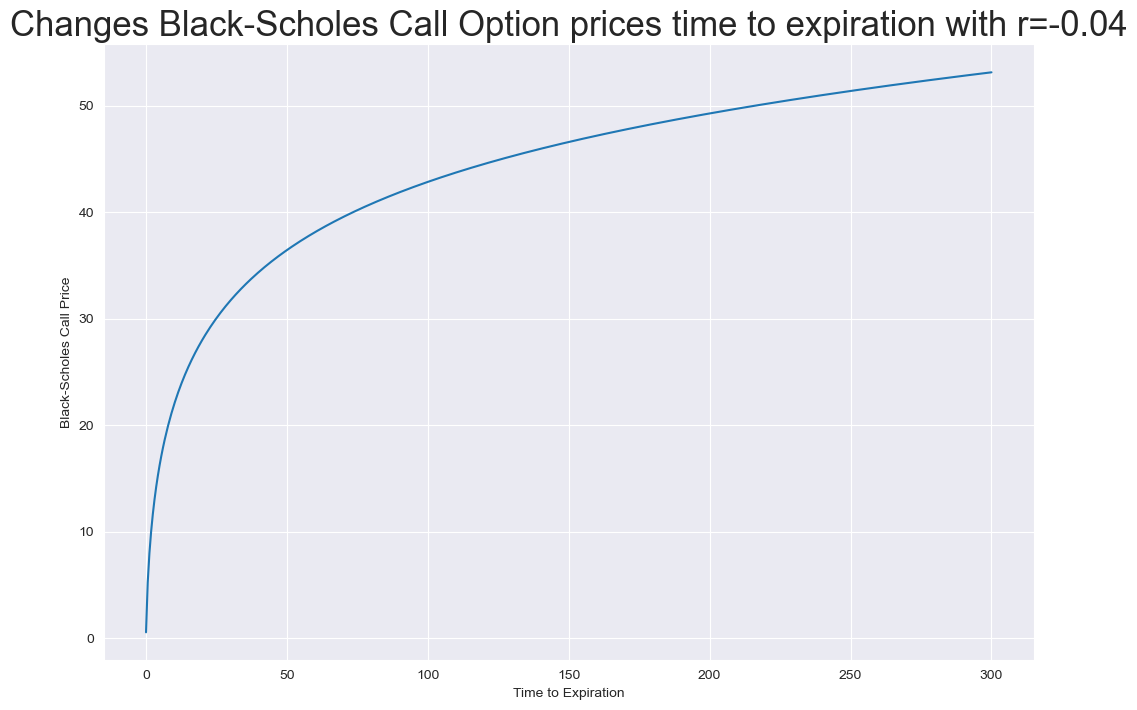

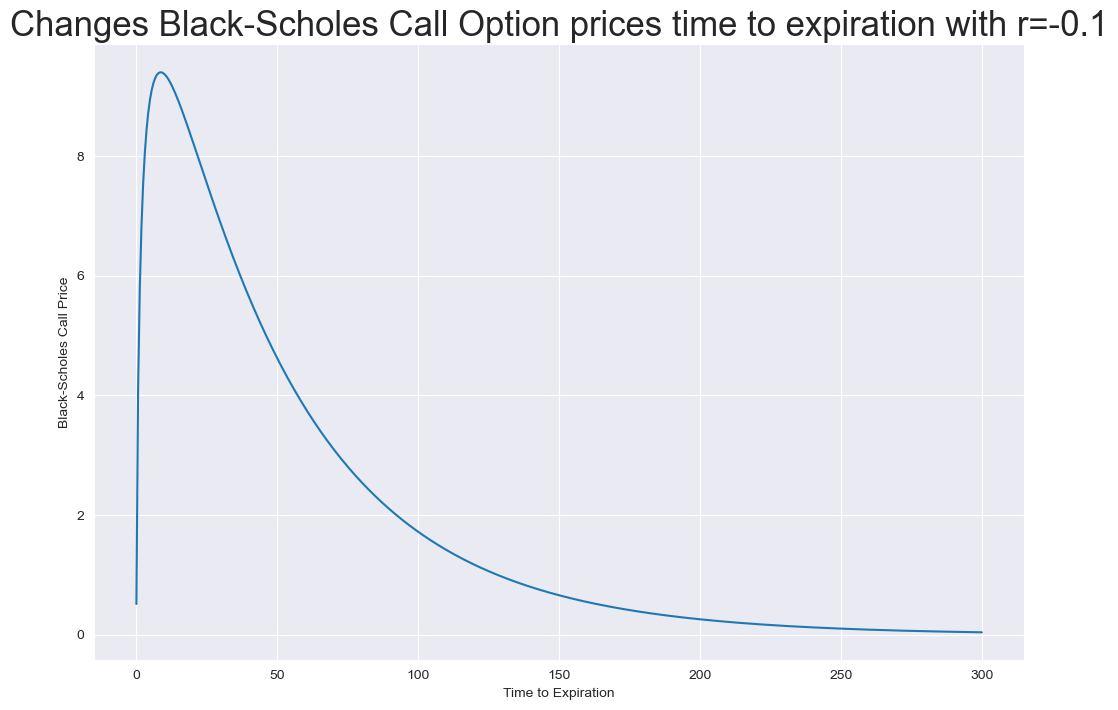

In [323]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 300,500)


call_prices_r0 = [bs_call(S0,K,sigma, t = times[i],r=0) for i in range(len(times))]

call_prices_rp = [bs_call(S0,K,sigma, t = times[i],r=0.04) for i in range(len(times))]

call_prices_rm1 = [bs_call(S0,K,sigma, t = times[i],r=-0.04) for i in range(len(times))]

call_prices_rm2 = [bs_call(S0,K,sigma, t = times[i],r=-0.1) for i in range(len(times))]

call_prices=[call_prices_r0,call_prices_rp,call_prices_rm1,call_prices_rm2]


for r,call_prices in zip([0,0.04,-0.04,-0.1],call_prices):
    plt.figure(figsize = (12,8))
    plt.title(f'Changes Black-Scholes Call Option prices time to expiration with r={r}', size = 25)
    plt.plot(times, call_prices)
    plt.xlabel('Time to Expiration')
    plt.ylabel('Black-Scholes Call Price')


plt.show()

### a) From the plots for different r, we observe that for $r$ that is not too negative, i.e., $r+\sigma^2/2\geq 0$, if we increase $t$ from $1/12$ to a large value, then the rate of change will gradually decreases to zero. In contrast, for r such that $r+\sigma^2/2< 0$, the rate of change will first decrease to negative values and then increase back to zero, simply because the option price need to be zero when $t$ goes to infinity in this case.

These phenomenon can be understood by looking at

$$\frac{\partial C_0}{\partial t}=-\Theta_{C_0}= \frac{S_0\varphi(d_1)\sigma}{2\sqrt{t}} + rKe^{-rt}\Phi(d_2).$$

$\frac{\partial C_0}{\partial t}$ goes to zero as the time to expiration goes to infinity no matter what $r,K,S_0$ are. However, when time to expiration goes to zero, for the at-the-money call options $\frac{\partial C_0}{\partial t}$ will diverge as $1/\sqrt{t}$ while for the in-the-money  (out-of-money) call options $\frac{\partial C_0}{\partial t}$ will converge to $rK$ ($0$).  With the observation in the above plot for $t\in[1/12,300]$, I conclude that for both the in-the-money and out-of-money call options, (1)$\frac{\partial C_0}{\partial t}$ will first increase at small $t$ and then decrease at larger $t$; (2) Depending on the sign of $r+\sigma^2/2$, it will either first decrease to negative values and then increase back to zero or directly decreases to zero.  This conclusion can be rigorously checked by studying $\frac{\partial^{2} C_0}{\partial t^2}$ and is supported by directly plotting the $\frac{\partial C_0}{\partial t}$ v.s. time-to-expiration curves as follows.




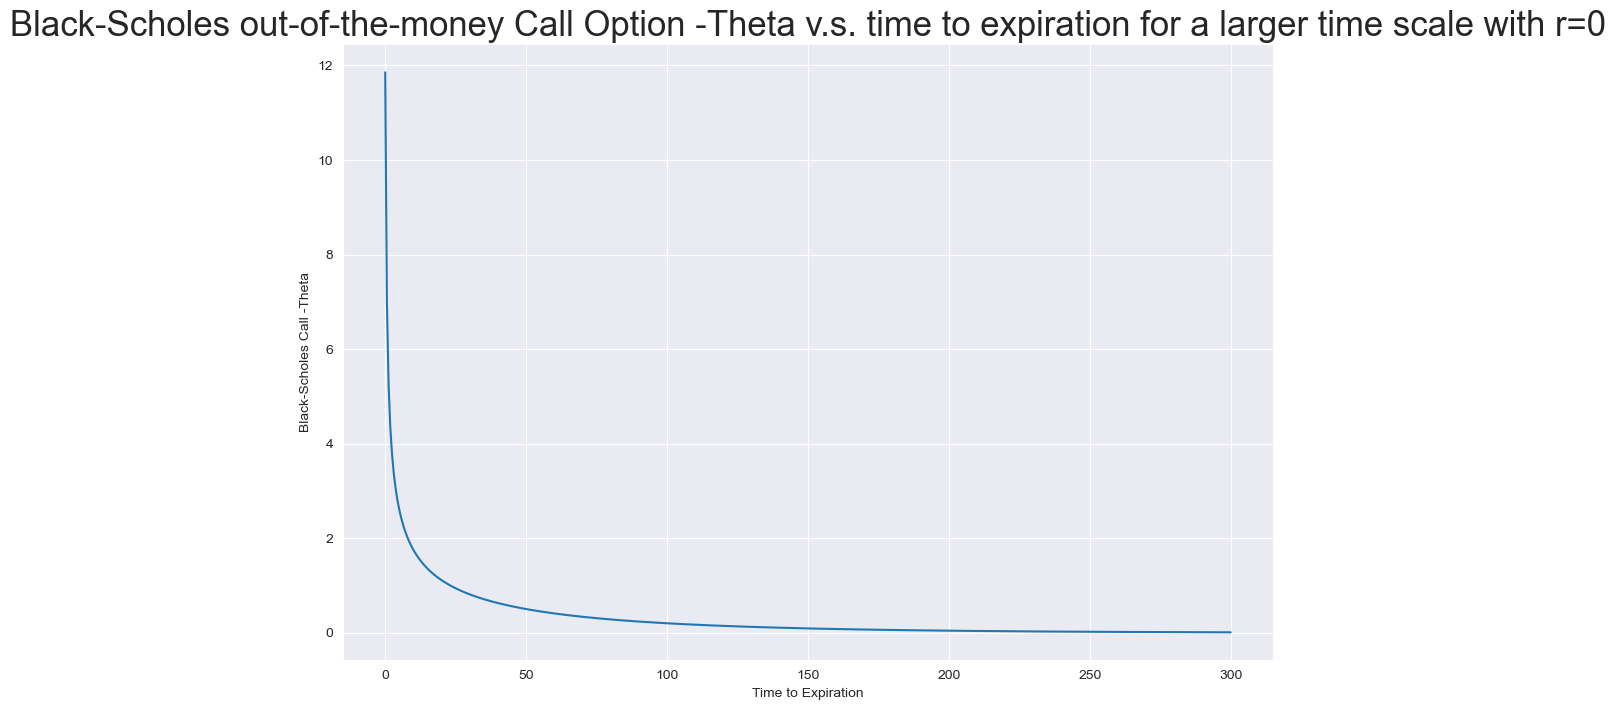

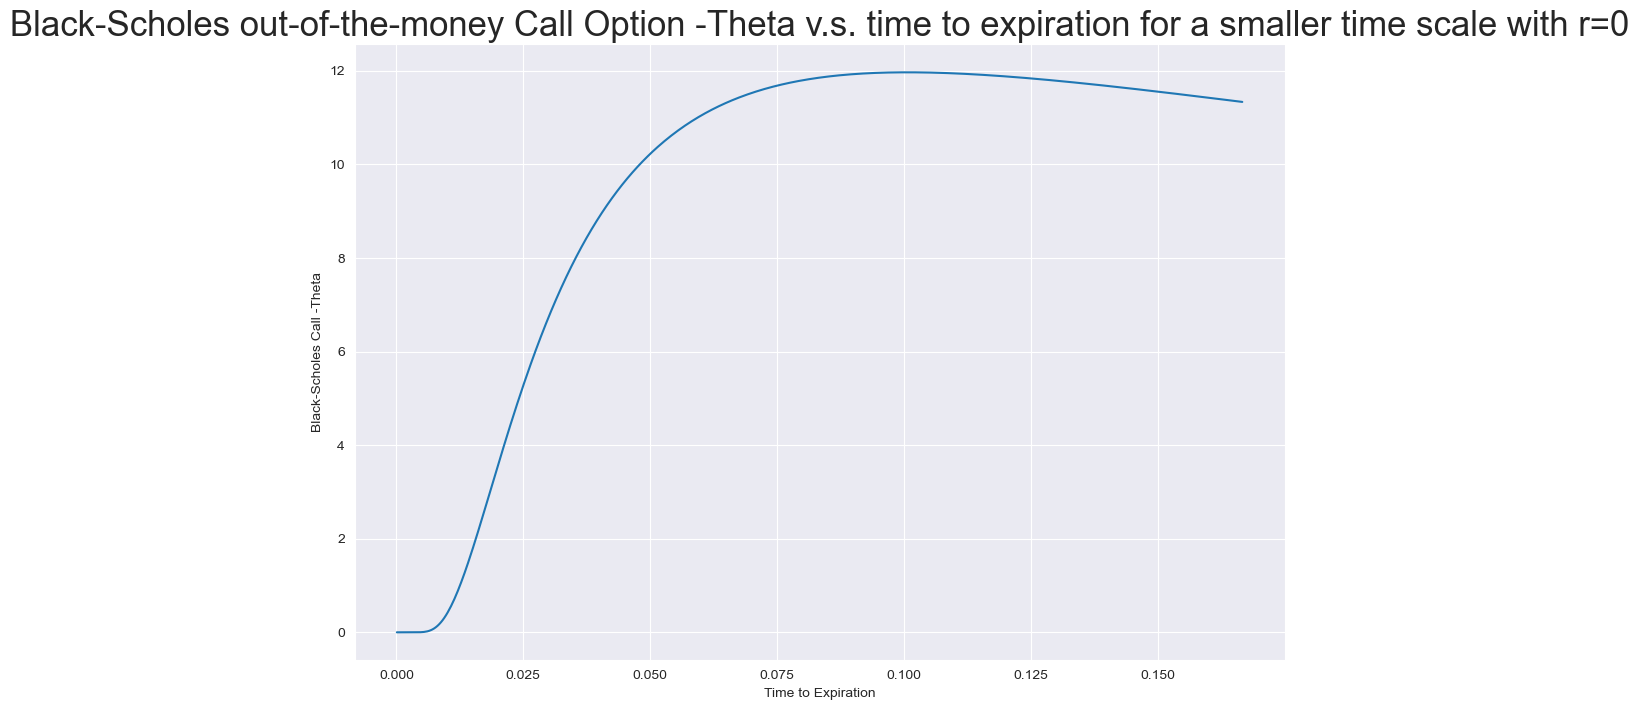

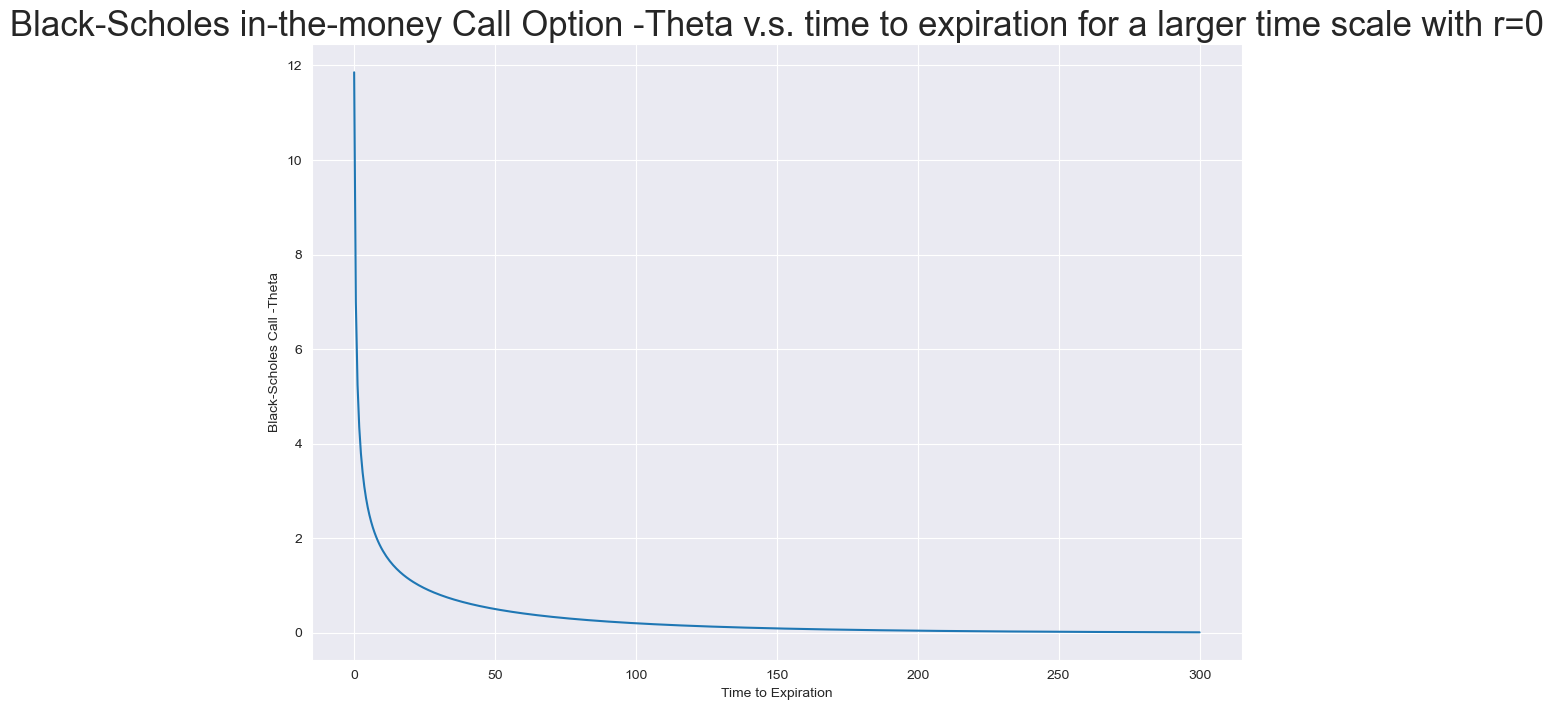

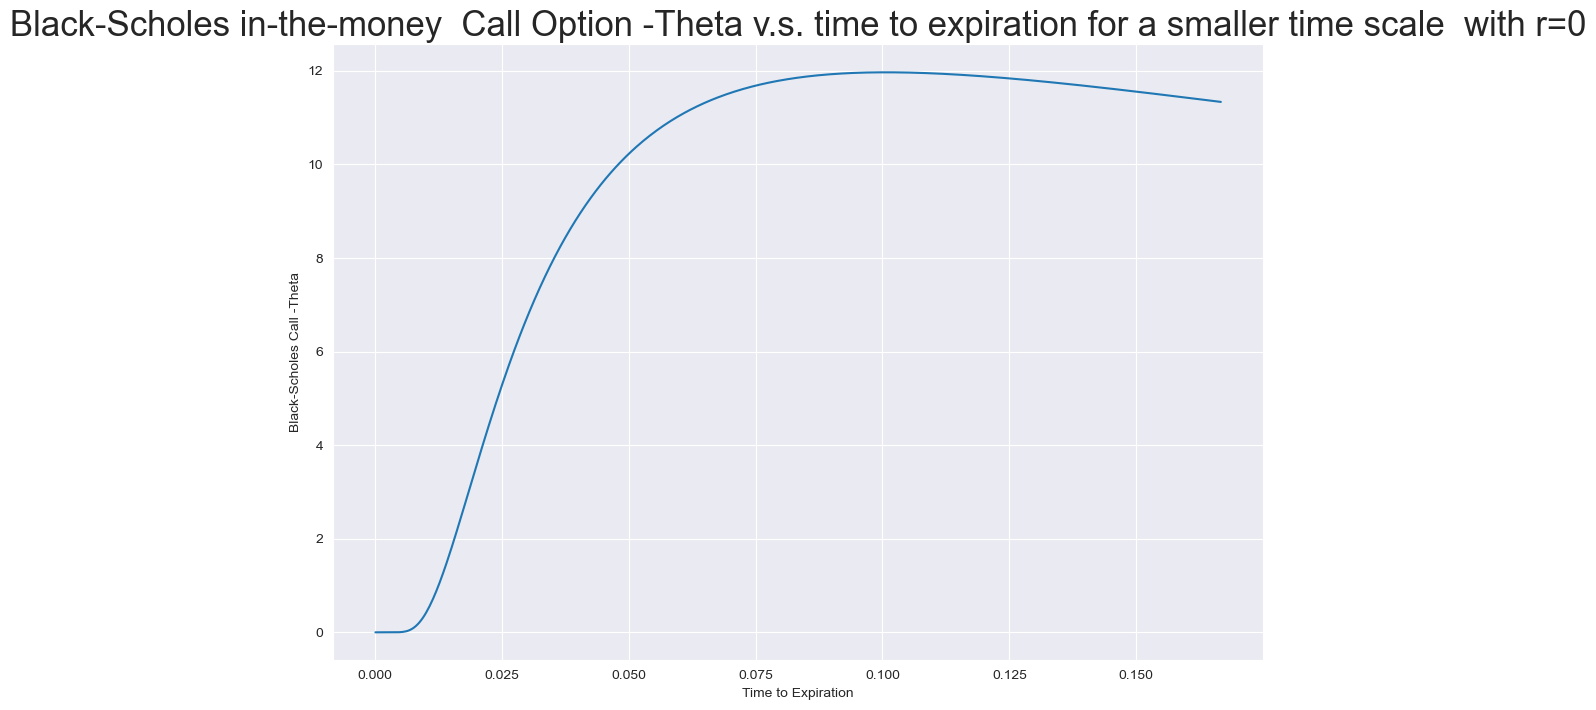

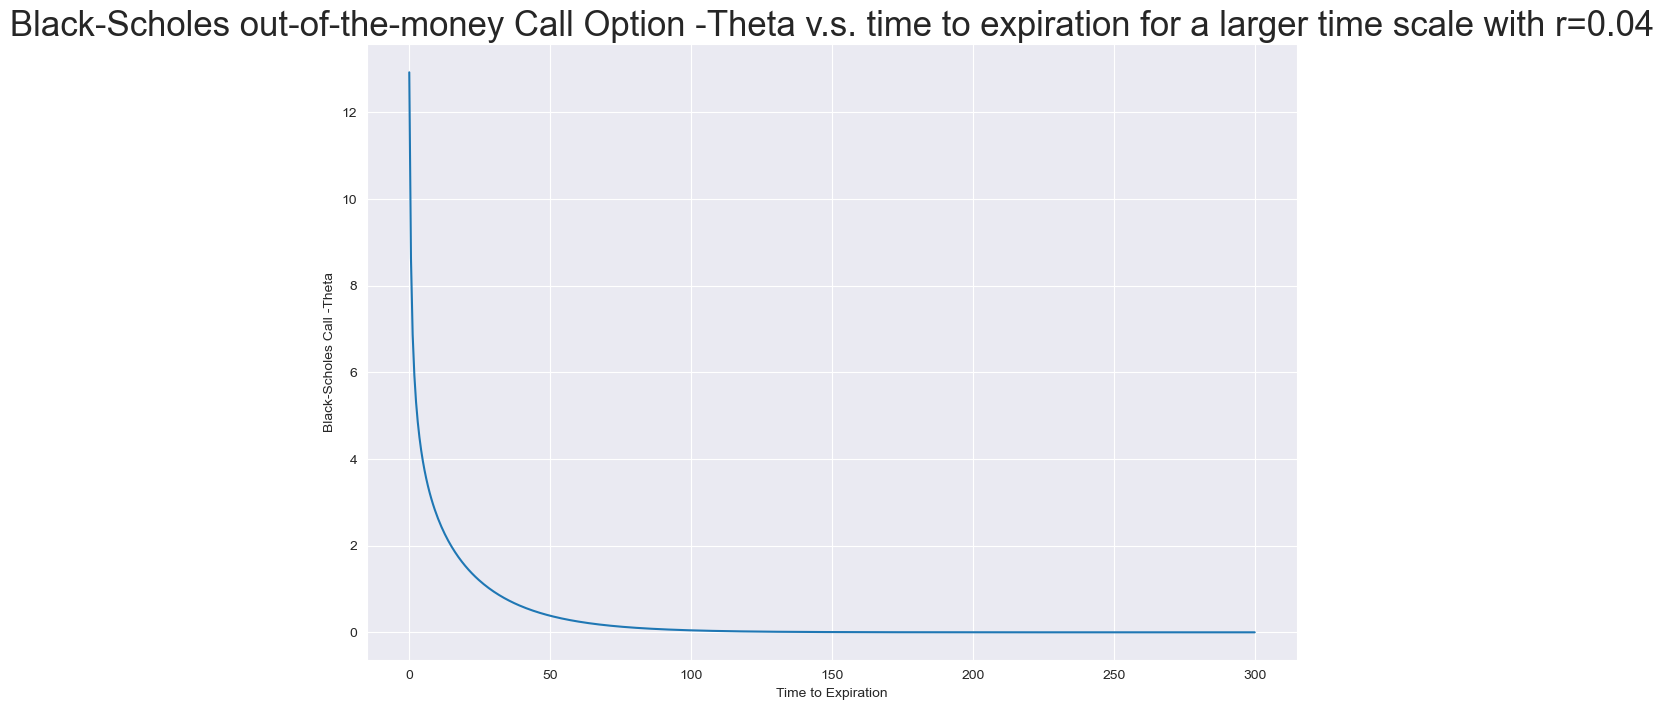

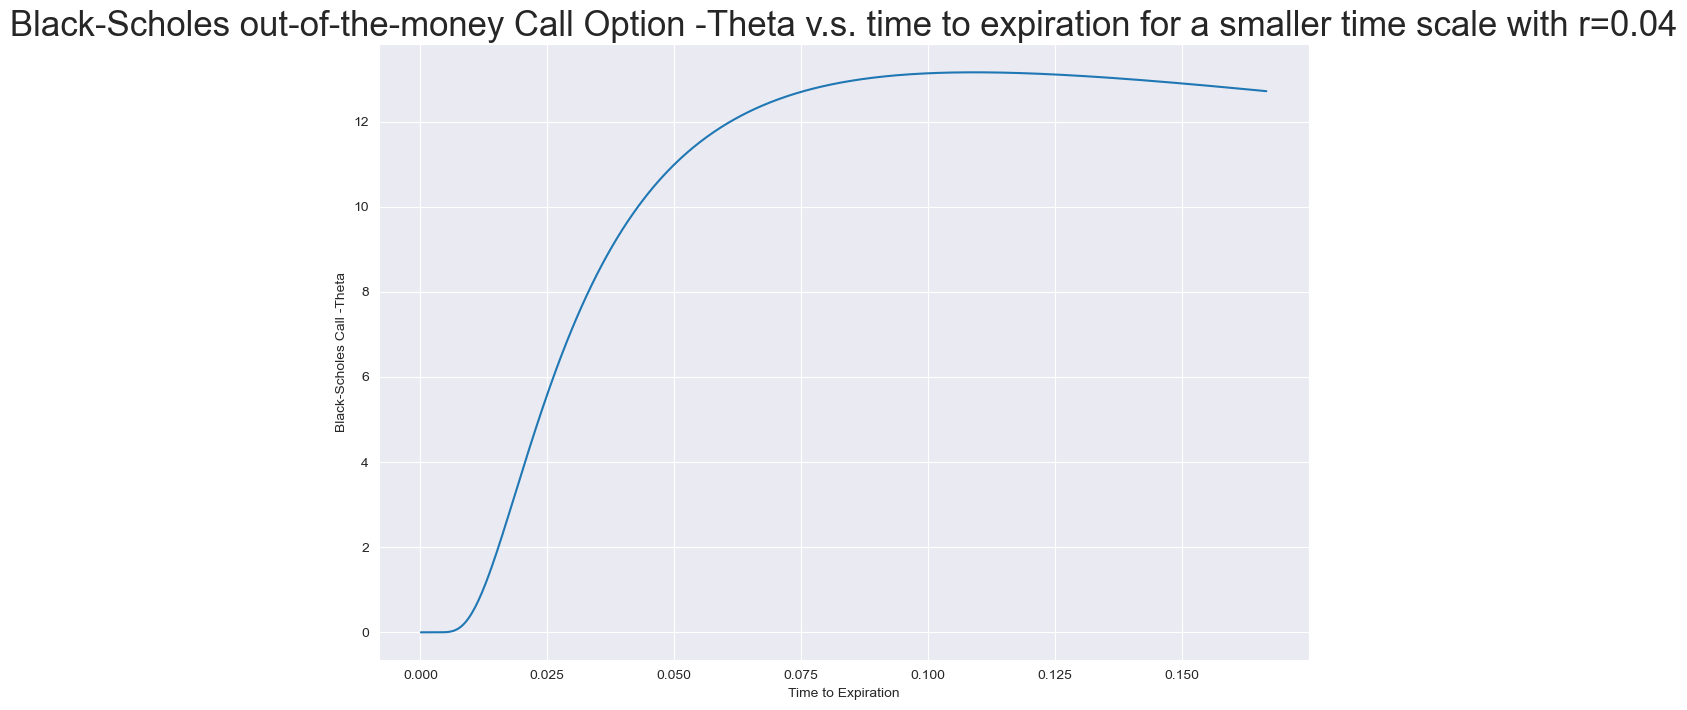

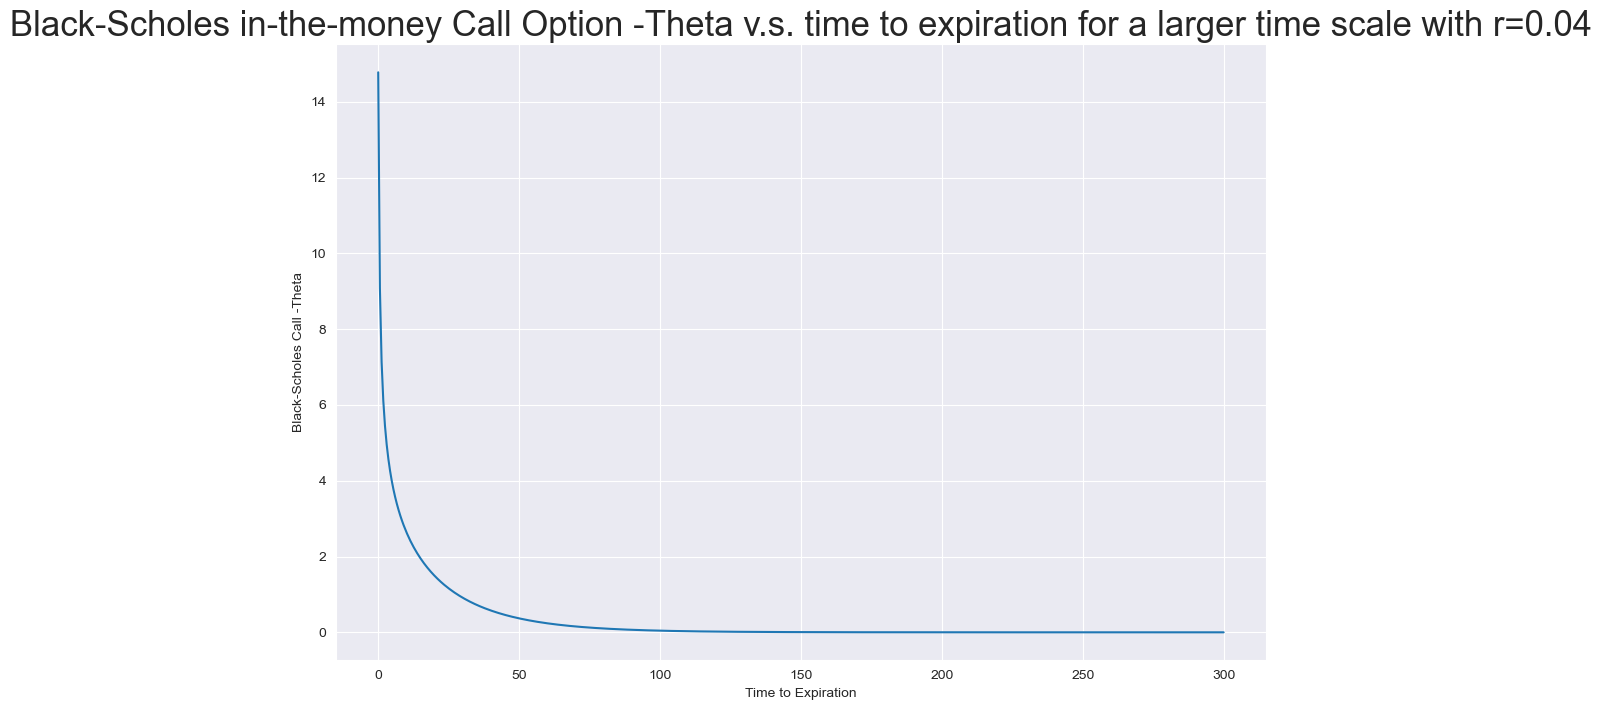

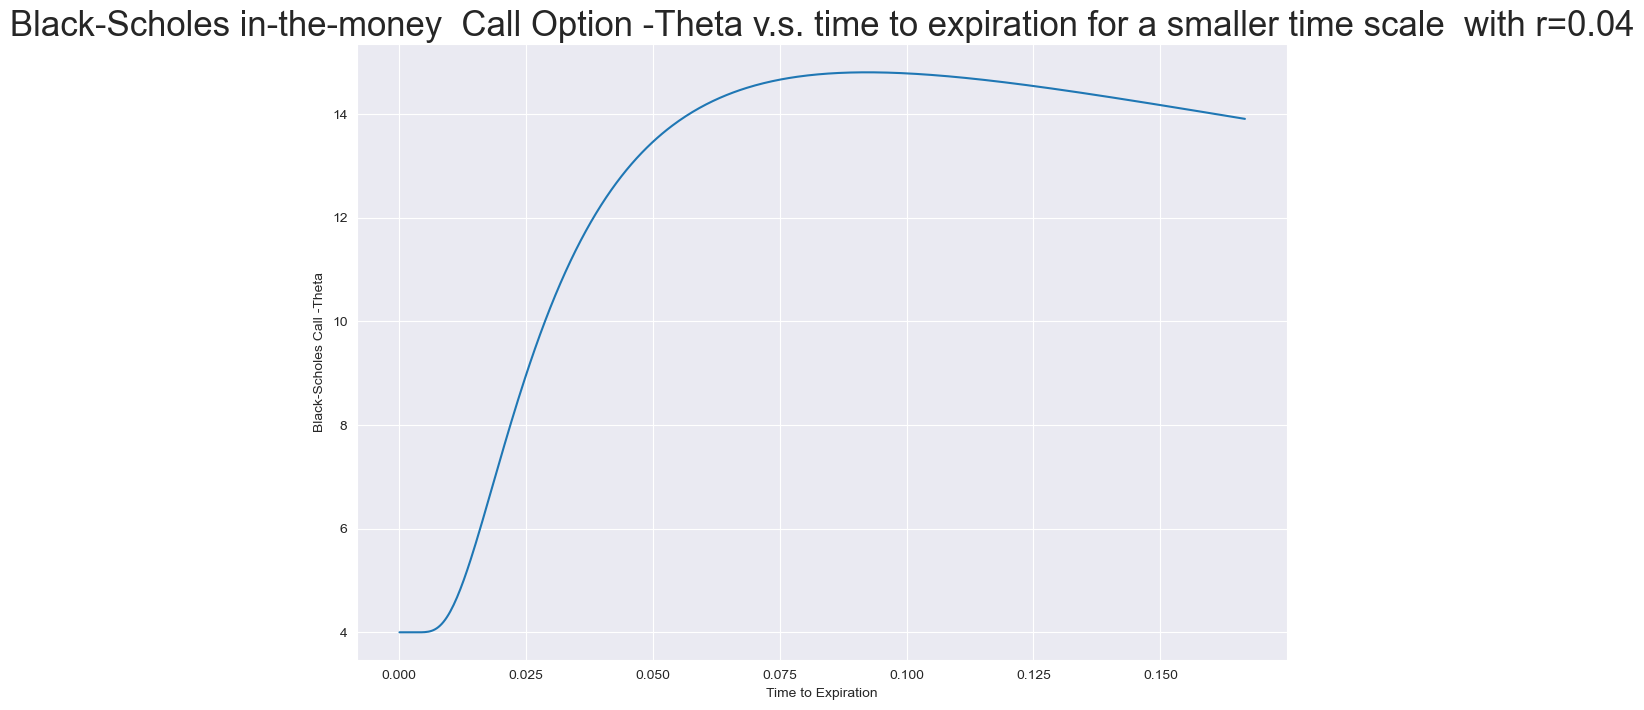

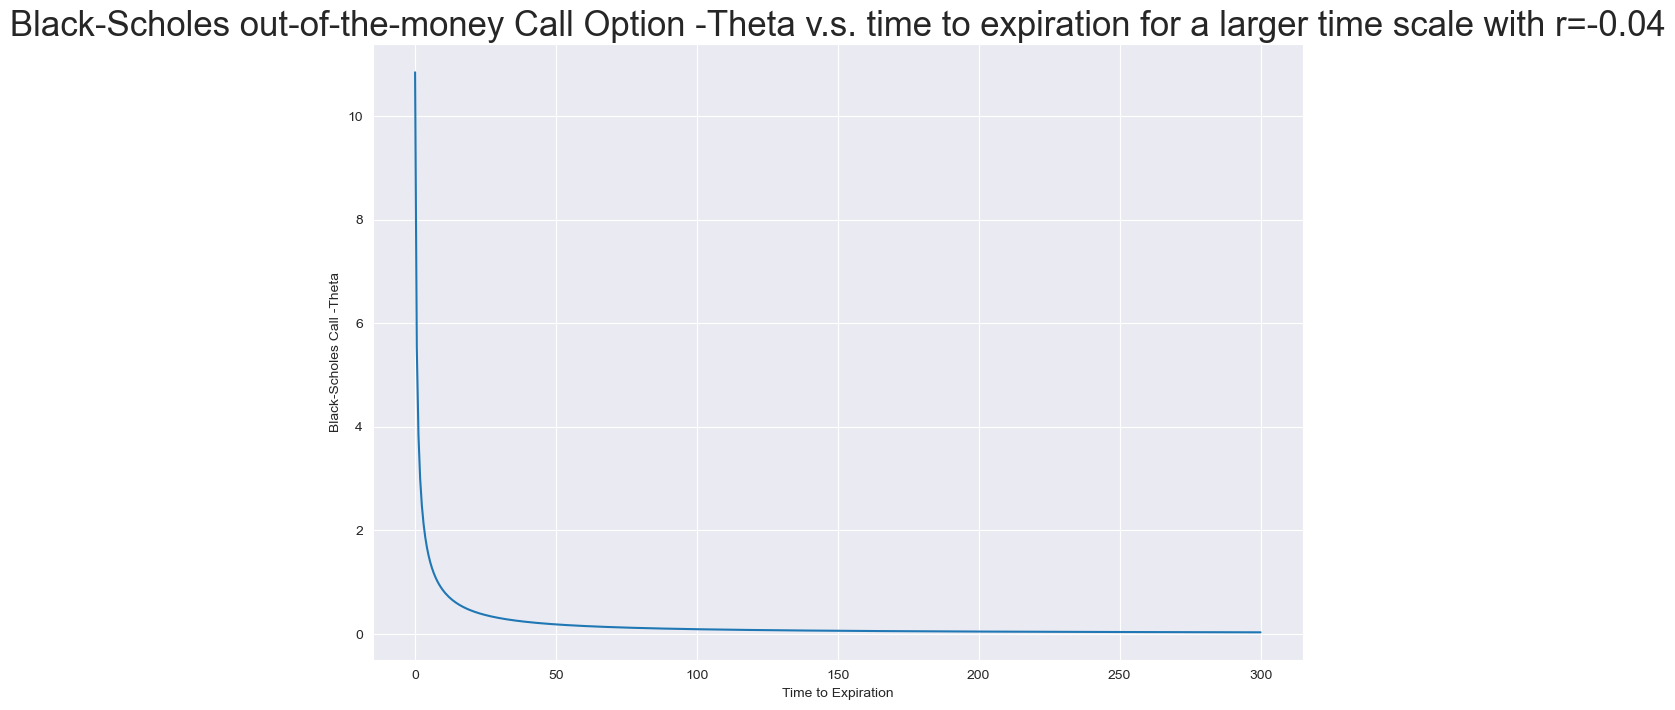

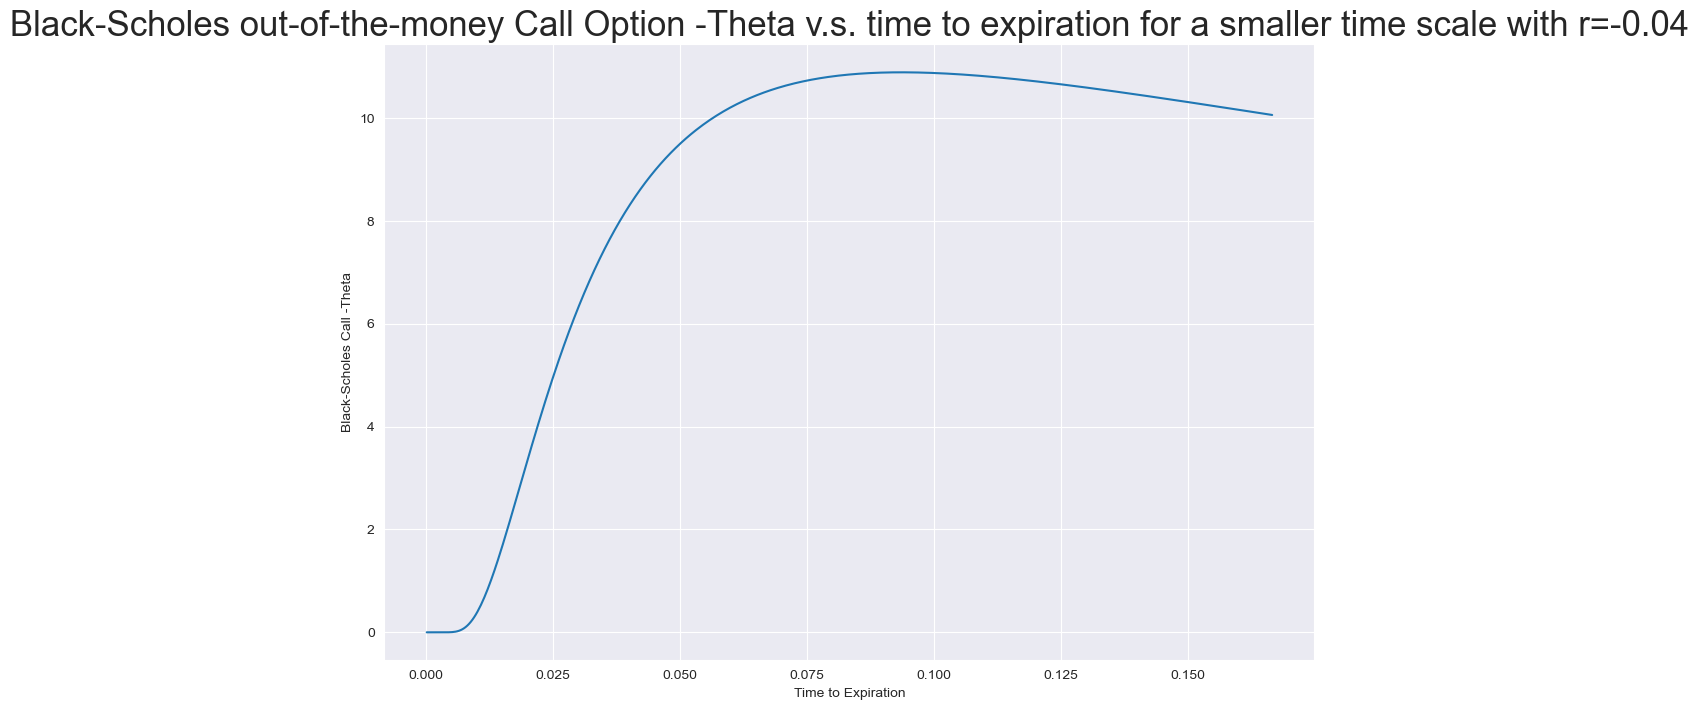

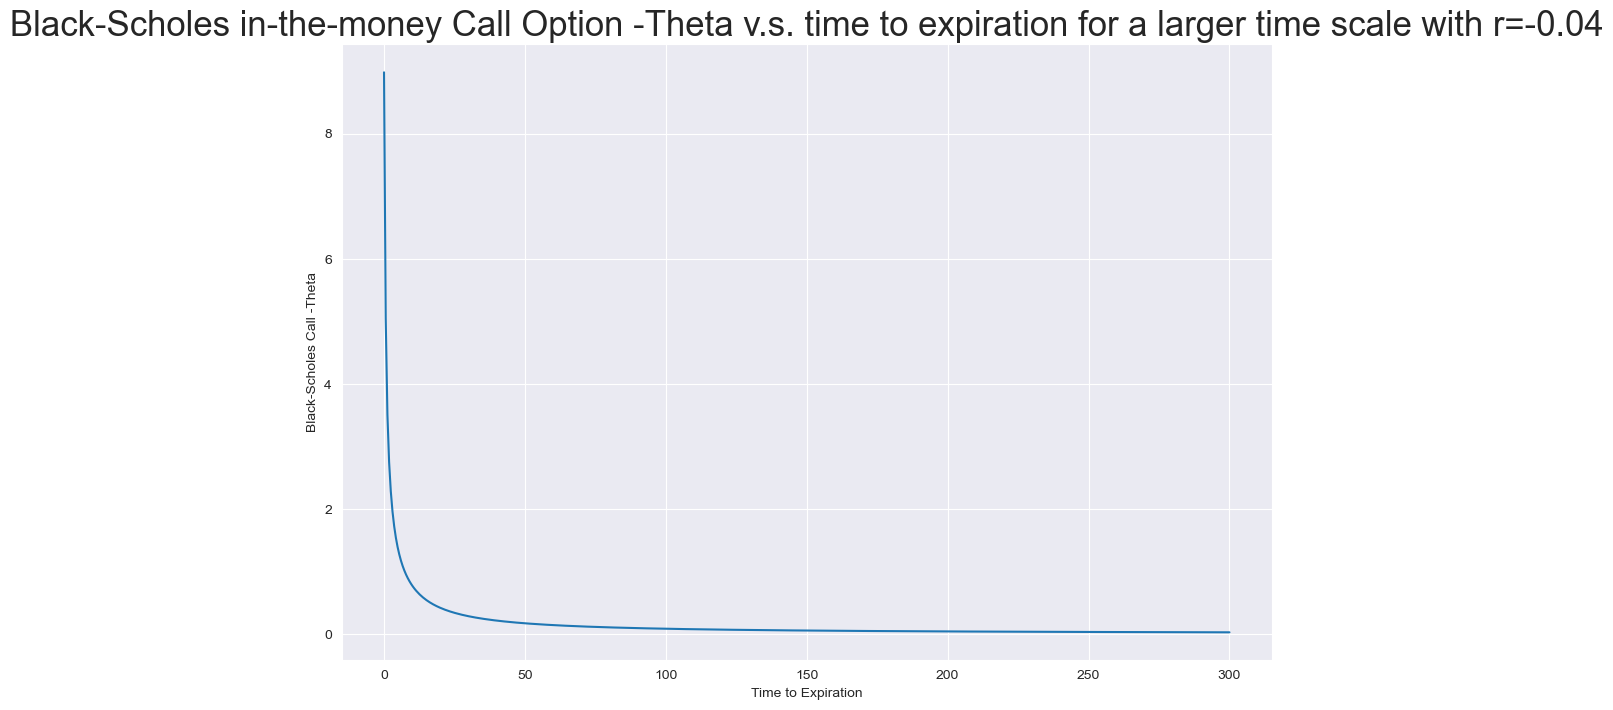

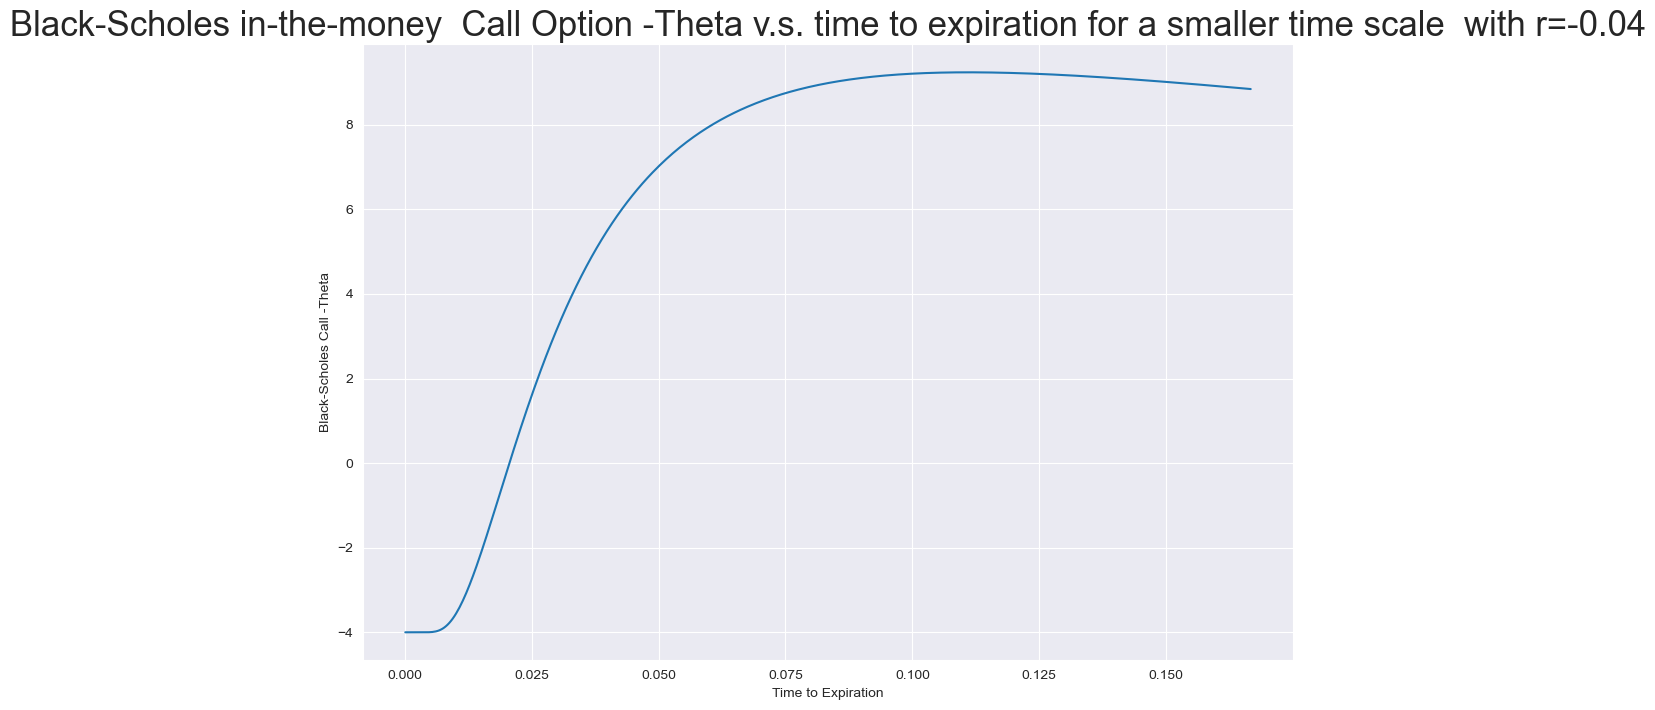

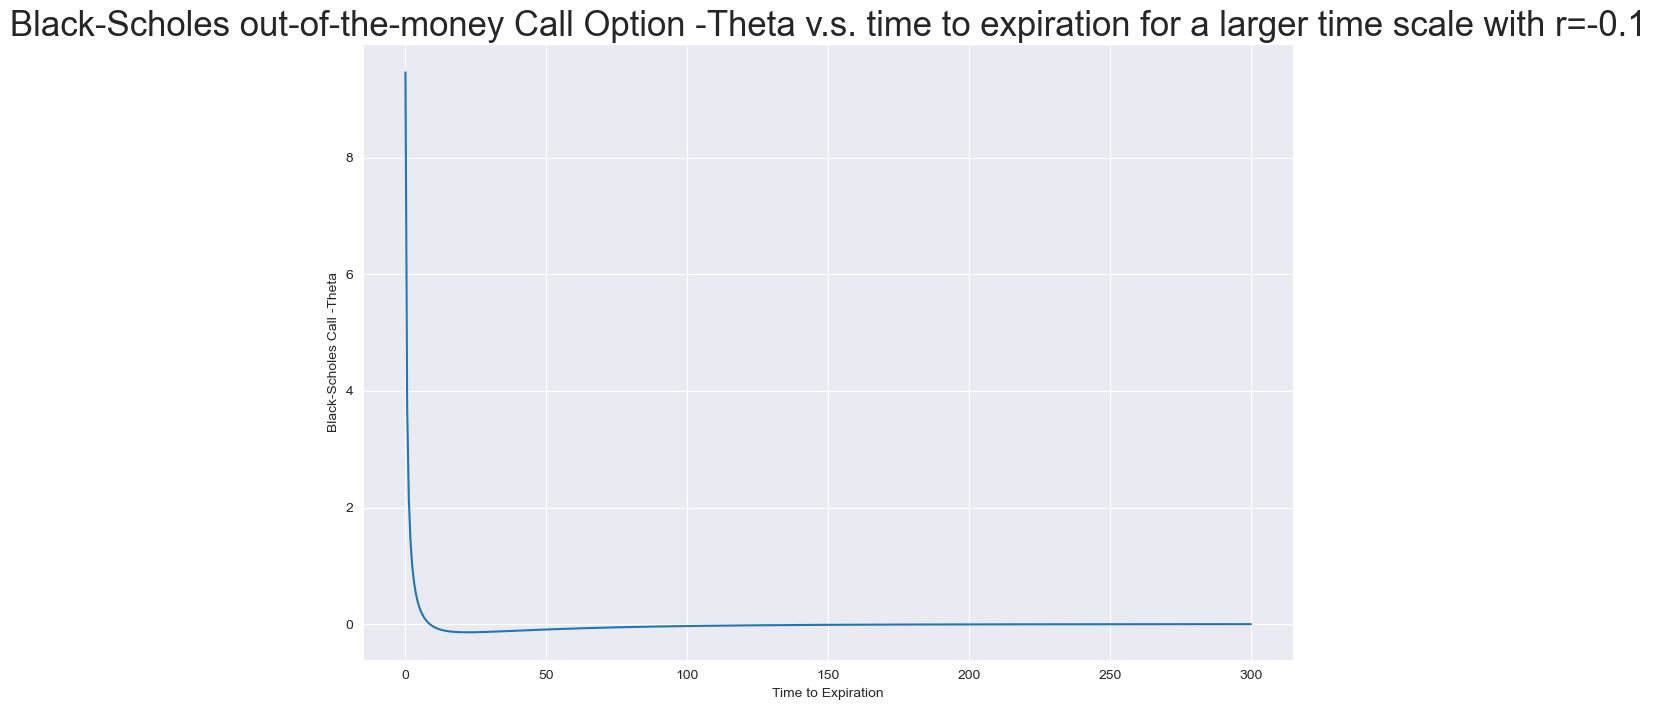

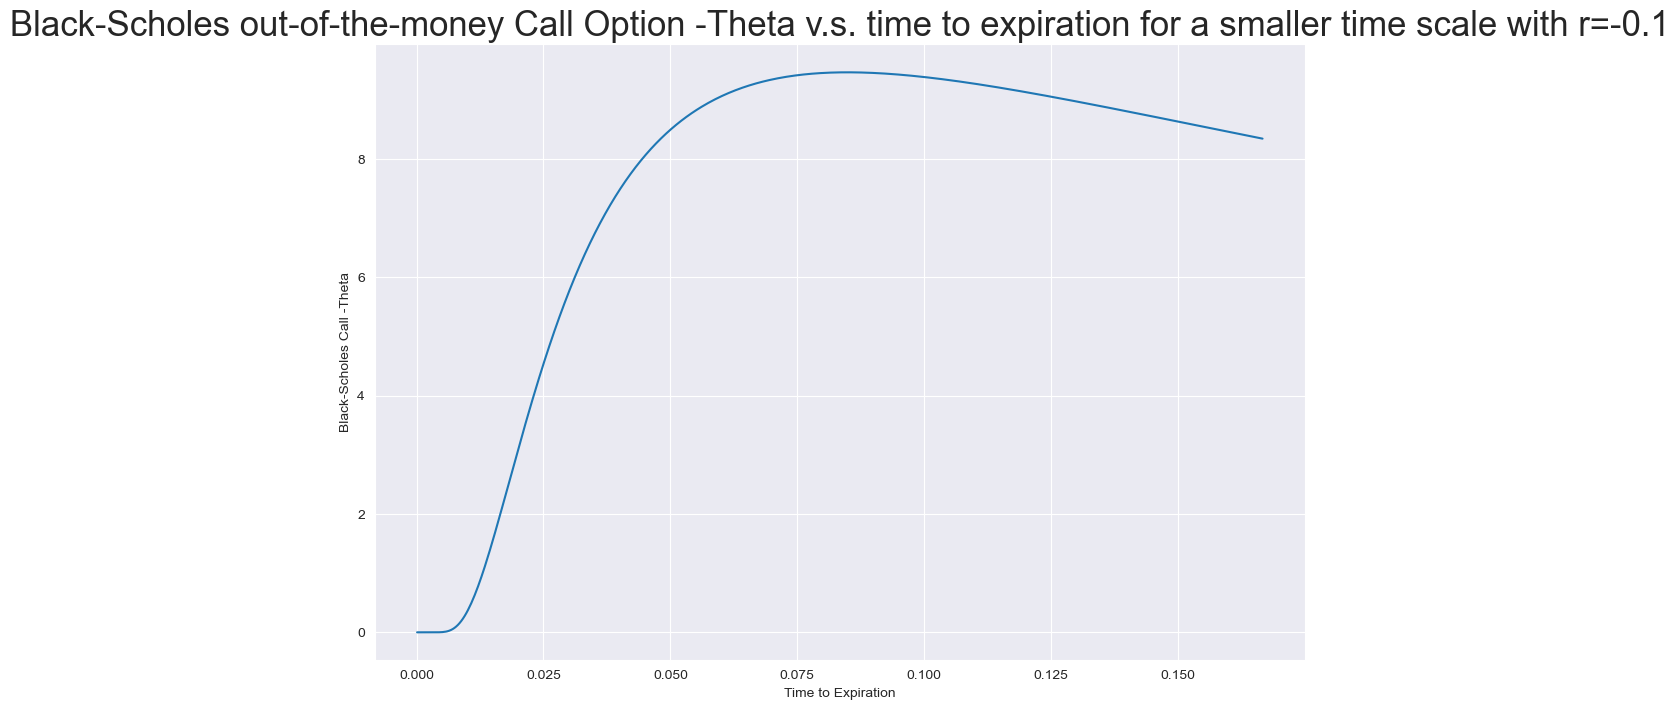

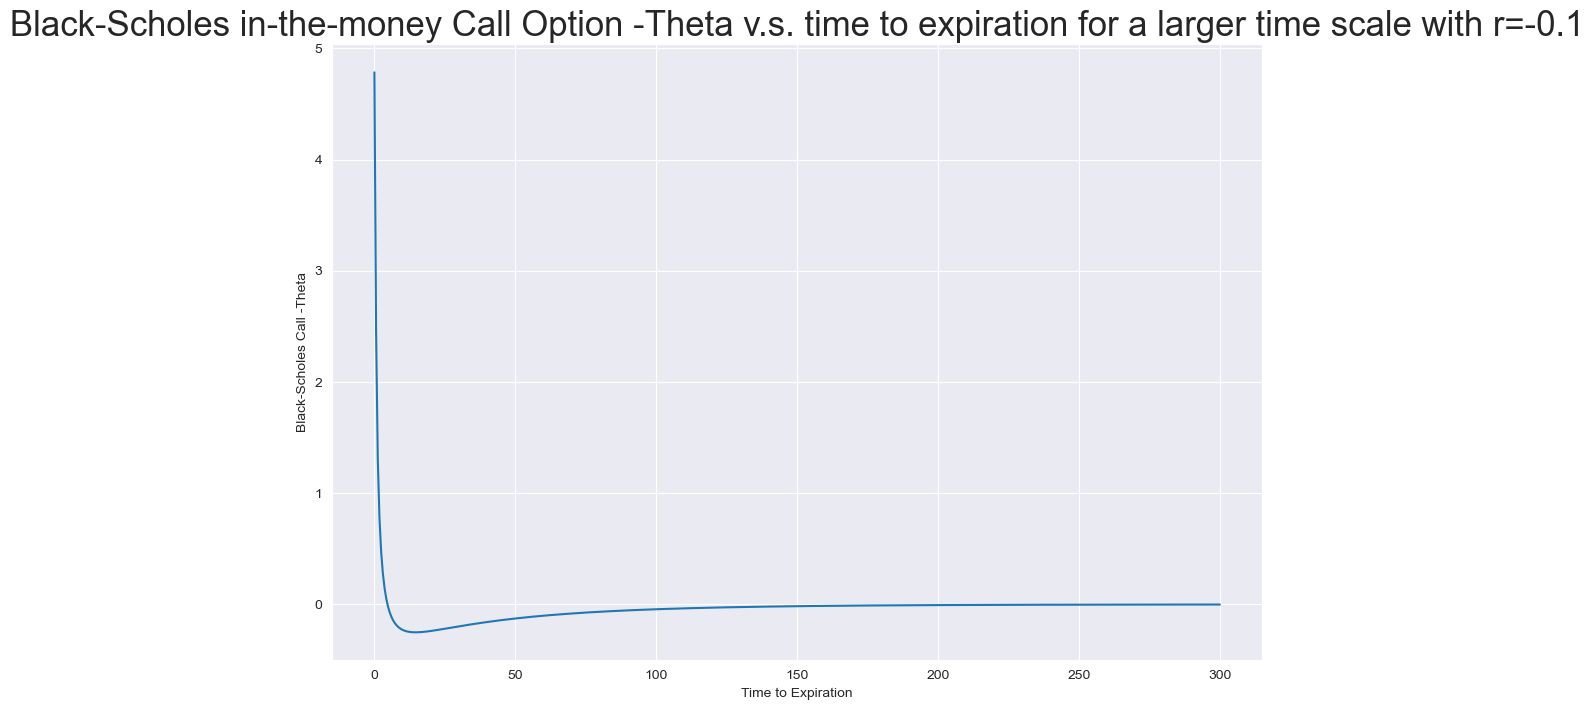

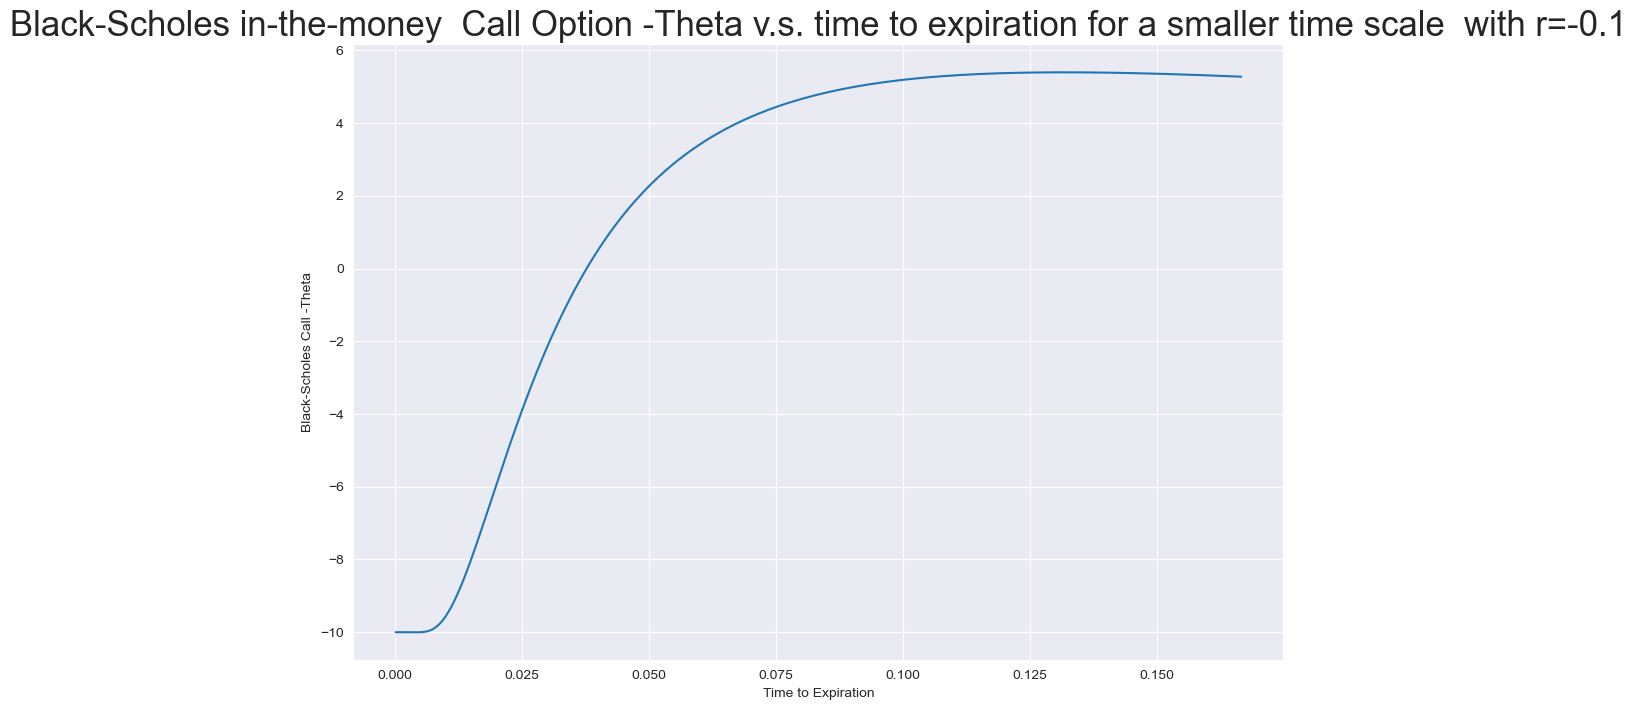

In [325]:
### numerical check for the conclusion in a)
def bs_call_theta(S0,K,sigma,t,r=0.):
    """
    Returns the theta (rate of change with respect to time) of a European call option
    under Black-Scholes assumptions.
    
    
    To give daily theta, divide return by 252.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Theta of Call option
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    
    return (-S0*norm.pdf(d1)*sigma)/(2*np.sqrt(t)) - r*K*np.exp(-r*t)*norm.cdf(d2)
    

sigma = .3
times = np.linspace(1/12, 300, 500)
times_small_scale=np.linspace(0.0001, 1/6, 500)

for r in [0,0.04,-0.04,-0.1]:
# out-of-the-money (S0<K)
    S0 = 100
    K = 110
    call_theta = [-bs_call_theta(S0,K,sigma, t = times[i],r=r) for i in range(len(times))]
    call_theta_small_scale = [-bs_call_theta(S0,K,sigma, t = times_small_scale[i],r=r) for i in range(len(times_small_scale))]
# call_theta_with_r = [-bs_call_theta(S0,K,sigma, t = times[i],r=0.04) for i in range(len(times))]
# call_theta_small_scale_with_r = [-bs_call_theta(S0,K,sigma, t = times_small_scale[i],r=0.04) for i in range(len(times_small_scale))]

# in-the-money (S0>K)
    S0 = 110
    K = 100
    call_theta1 = [-bs_call_theta(S0,K,sigma, t = times[i],r=r) for i in range(len(times))]
    call_theta_small_scale1 = [-bs_call_theta(S0,K,sigma, t = times_small_scale[i],r=r) for i in range(len(times_small_scale))]
# call_theta_with_r1 = [-bs_call_theta(S0,K,sigma, t = times[i],r=0.04) for i in range(len(times))]
# call_theta_small_scale_with_r1 = [-bs_call_theta(S0,K,sigma, t = times_small_scale[i],r=0.04) for i in range(len(times_small_scale))]



    plt.figure(figsize = (12,8))
    plt.title(f'Black-Scholes out-of-the-money Call Option -Theta v.s. time to expiration for a larger time scale with r={r}', size = 25)
    plt.plot(times, call_theta)
    plt.xlabel('Time to Expiration')
    plt.ylabel('Black-Scholes Call -Theta')

    plt.figure(figsize = (12,8))
    plt.title(f'Black-Scholes out-of-the-money Call Option -Theta v.s. time to expiration for a smaller time scale with r={r}', size = 25)
    plt.plot(times_small_scale, call_theta_small_scale)
    plt.xlabel('Time to Expiration')
    plt.ylabel('Black-Scholes Call -Theta')

    plt.figure(figsize = (12,8))
    plt.title(f'Black-Scholes in-the-money Call Option -Theta v.s. time to expiration for a larger time scale with r={r}', size = 25)
    plt.plot(times, call_theta1)
    plt.xlabel('Time to Expiration')
    plt.ylabel('Black-Scholes Call -Theta')

    plt.figure(figsize = (12,8))
    plt.title(f'Black-Scholes in-the-money  Call Option -Theta v.s. time to expiration for a smaller time scale  with r={r}', size = 25)
    plt.plot(times_small_scale, call_theta_small_scale1)
    plt.xlabel('Time to Expiration')
    plt.ylabel('Black-Scholes Call -Theta')

plt.show()

### b) Dependence of rate of change of Black-Scholes call option price on the spot price

To understand this, I first plot a 3D figure about $\frac{\partial C_{0}}{\partial t}$ v.s. time to expiration v.s. spot price. And then analyze the dependence of $\frac{\partial C_{0}}{\partial t}$ on $S_{0}$ by studying $\frac{\partial^2 C_{0}}{\partial t\partial S_{0}}$ 

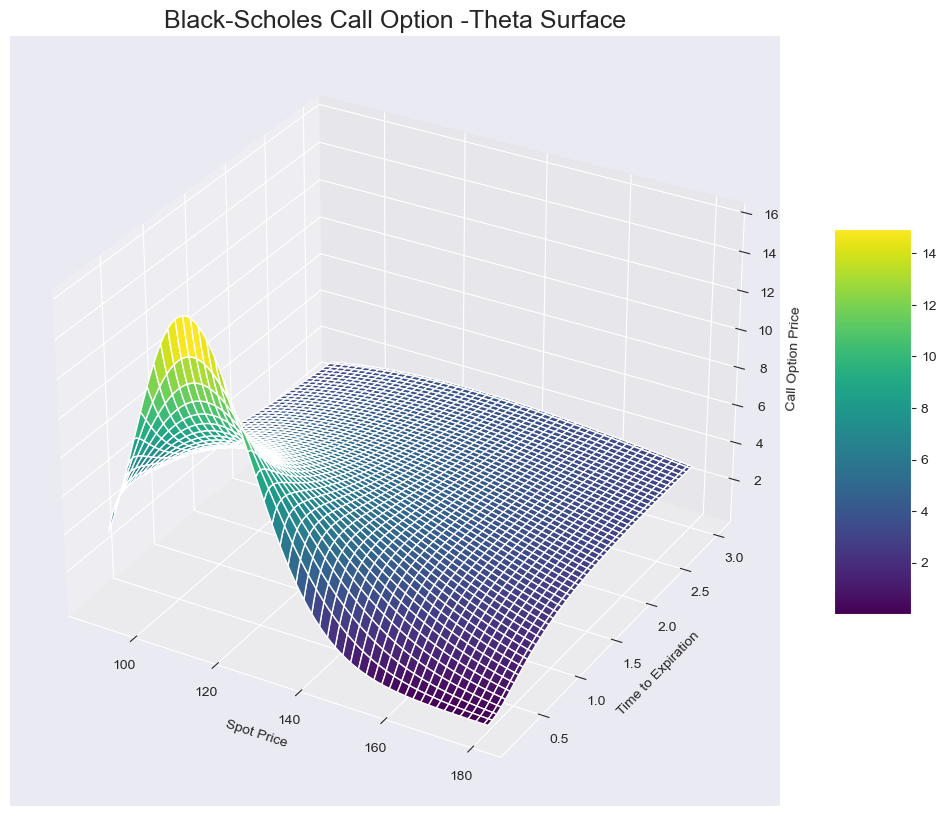

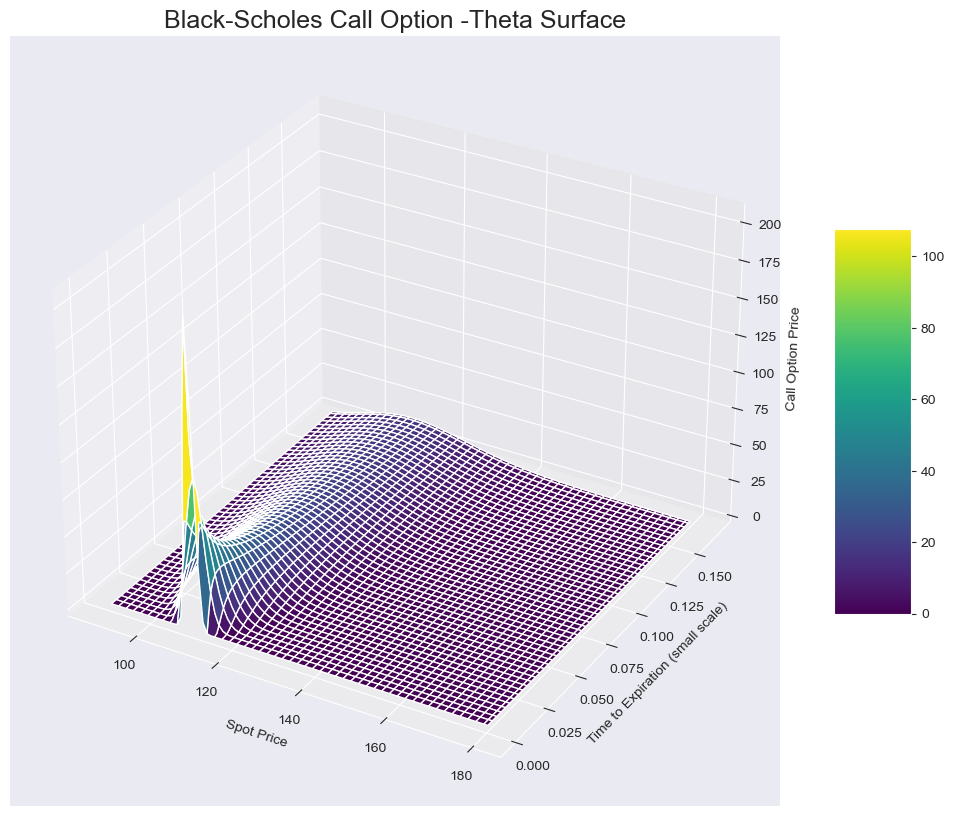

In [355]:
###
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting
from matplotlib import cm  # Color map for surface

    
K = 110
sigma = .3
times = np.linspace(1/6, 3, 100)
times_small_scale=np.linspace(0.001, 1/6, 100)
spotprices=np.linspace(90,180,100)


put_theta = np.array([[-bs_call_theta(S, K, sigma, t=T,r=0) for T in times] for S in spotprices])
put_theta_small_scale = np.array([[-bs_call_theta(S, K, sigma, t=T,r=0) for T in times_small_scale] for S in spotprices])


T, S = np.meshgrid(times, spotprices)

# Plotting
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(S, T, put_theta, cmap=cm.viridis)

ax.set_title('Black-Scholes Call Option -Theta Surface', fontsize=18)
ax.set_ylabel('Time to Expiration')
ax.set_xlabel('Spot Price')
ax.set_zlabel('Call Option Price')

fig.colorbar(surf, shrink=0.5, aspect=5)  


T, S = np.meshgrid(times_small_scale, spotprices)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(S, T, put_theta_small_scale, cmap=cm.viridis)

ax.set_title('Black-Scholes Call Option -Theta Surface', fontsize=18)
ax.set_ylabel('Time to Expiration (small scale)')
ax.set_xlabel('Spot Price')
ax.set_zlabel('Call Option Price')

fig.colorbar(surf, shrink=0.5, aspect=5)  

plt.show()

As we can see from the above plots, the rate of change will first increase and then decrease when the spot price goes from 90 to 180, and the turning point, i.e., location of the maximum of $\frac{\partial C_{0}}{\partial t}$ along the $S_{0}$ axis at a given $t$, is shifting toward larger $S_{0}$ as we increase $t$. Let us now understand this behavior by directly calculate the derivative with respect to $S_0$ of $\frac{\partial C_{0}}{\partial t}$:

$$\frac{\partial}{\partial S_{0}}\frac{\partial C_{0}}{\partial t}=\frac{\varphi(d_1)\sigma}{2\sqrt{t}}+\frac{S_{0}\varphi(d_1)\sigma}{2\sqrt{t}}\frac{\partial (-d^2_{1}/2)}{\partial S_{0}} + rKe^{-rt}\varphi(d_2)\frac{\partial d_{2}}{\partial S_{0}}$$

Given that $\varphi(d_2)=\frac{1}{\sqrt{2\pi}}e^{-d_1^2/2}e^{d_1 \sigma\sqrt{t}-\sigma^2 t/2}=\frac{1}{\sqrt{2\pi}}e^{-d_1^2/2}\frac{S_0}{K} e^{rt}=\frac{S_0}{K} e^{rt}\varphi(d_1)$ and $\frac{\partial d_{1}}{\partial S_0}=\frac{\partial d_{2}}{\partial S_0}=\frac{1}{S_0}\frac{1}{\sigma\sqrt{t}}$, the above equation becomes 

$$\frac{\partial}{\partial S_{0}}\frac{\partial C_{0}}{\partial t}=\frac{\varphi(d_1)\sigma}{2\sqrt{t}}(\sigma-d_1/\sqrt{t}+2r/\sigma),$$

of which the sign is completely determined by $\text{sgn}(\sigma-d_1/\sqrt{t}+2r/\sigma)=\text{sgn}(\sigma^2/2+r-\ln(S_{0}/K)/t)$. That is to say, for a given $t$, the turning point happens at $S_{0}^{TP}=Ke^{(r+\sigma^2/2)t}$. When $S_{0}<S_{0}^{TP}$, rate of change increases as $S_{0}$ increases while when $S_{0}>S_{0}^{TP}$, rate of change decreases as $S_{0}$ increases. The expression for $S_{0}^{TP}$ indeed matches my observation for $r=0$.

### Time to expiration and spot price sensitivity of rate of chage of Black-Scholes put option prices.

Before going to numerical tests, let me first mention that here I will focus on 
$$\frac{\partial P_{0}}{\partial t}=-\Theta_{P_0} = \frac{S_0\varphi(d_1)\sigma}{2\sqrt{t}} - rKe^{-rt}\Phi(-d_2)$$

and its time derivative.

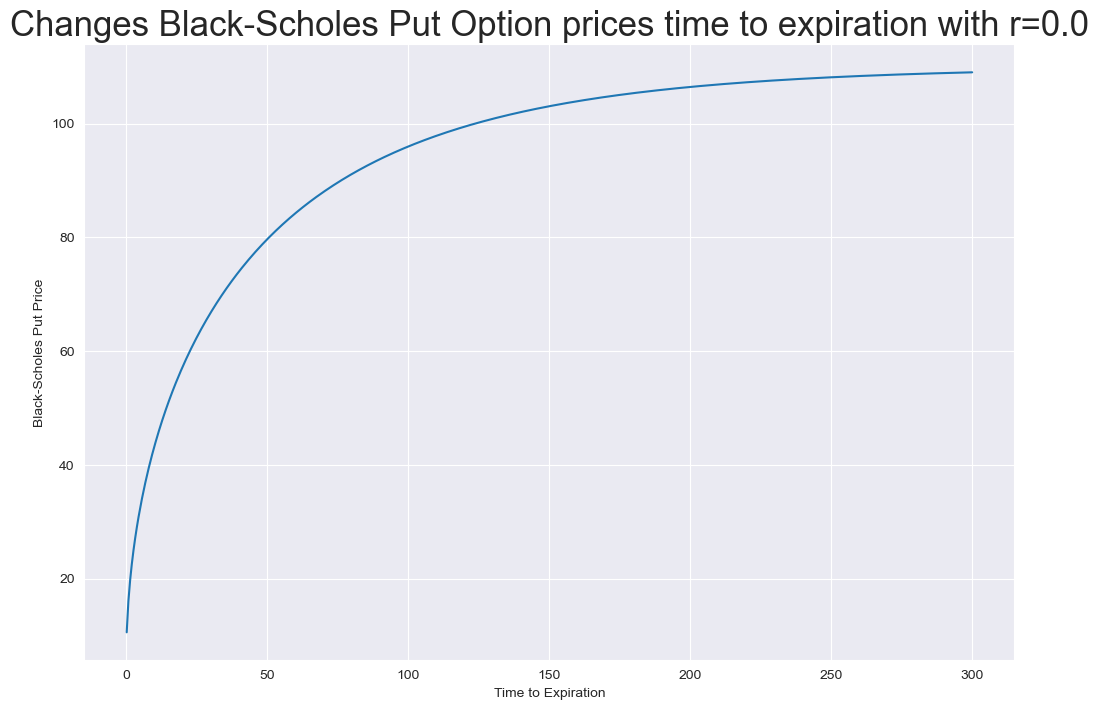

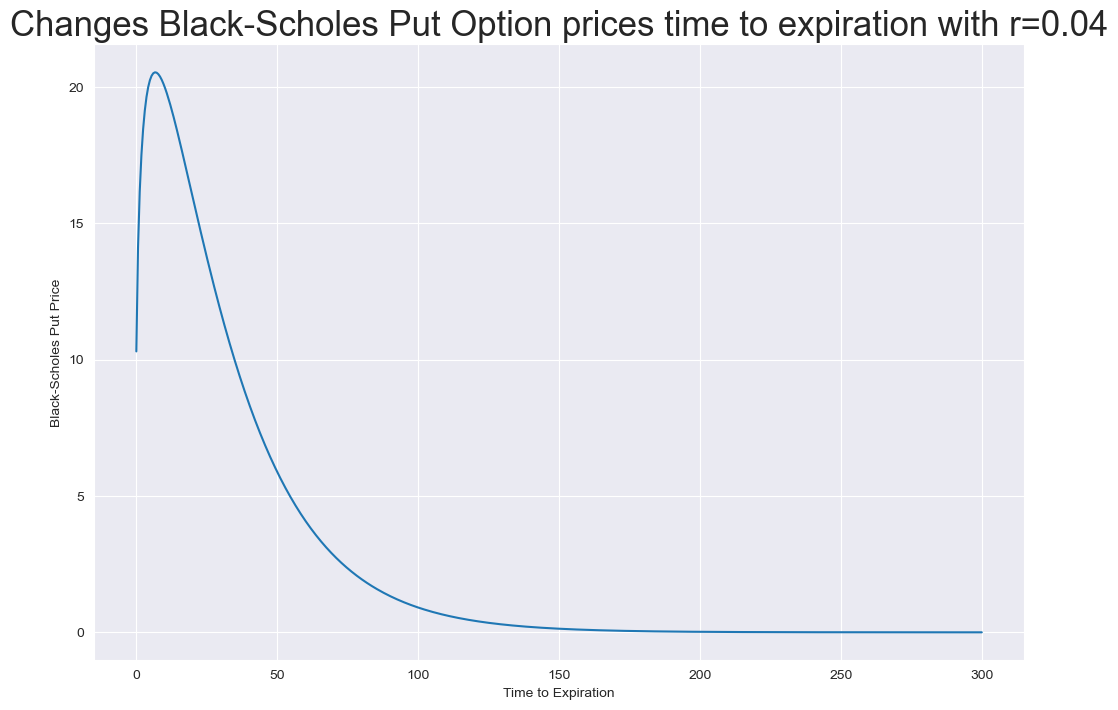

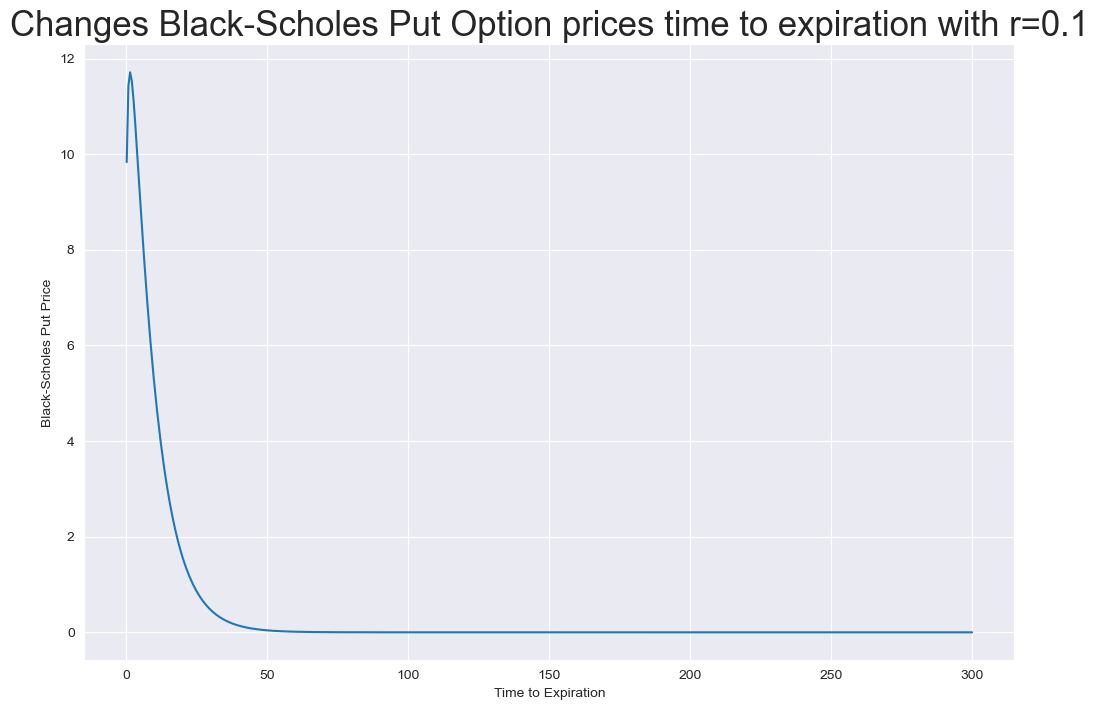

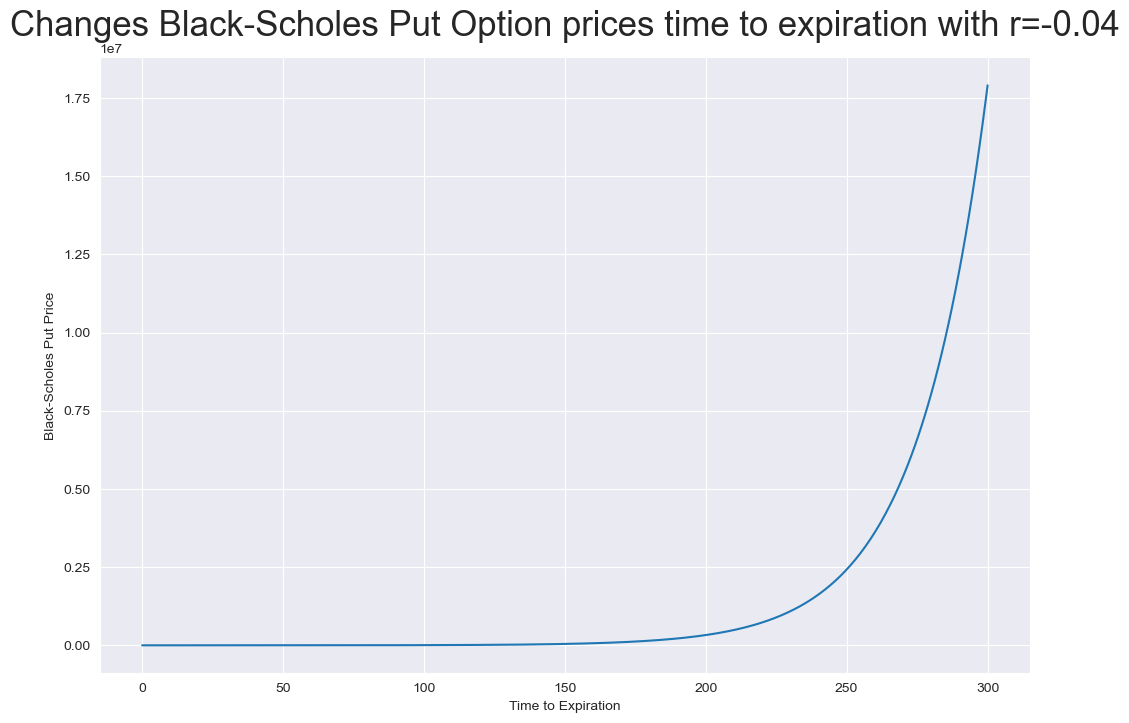

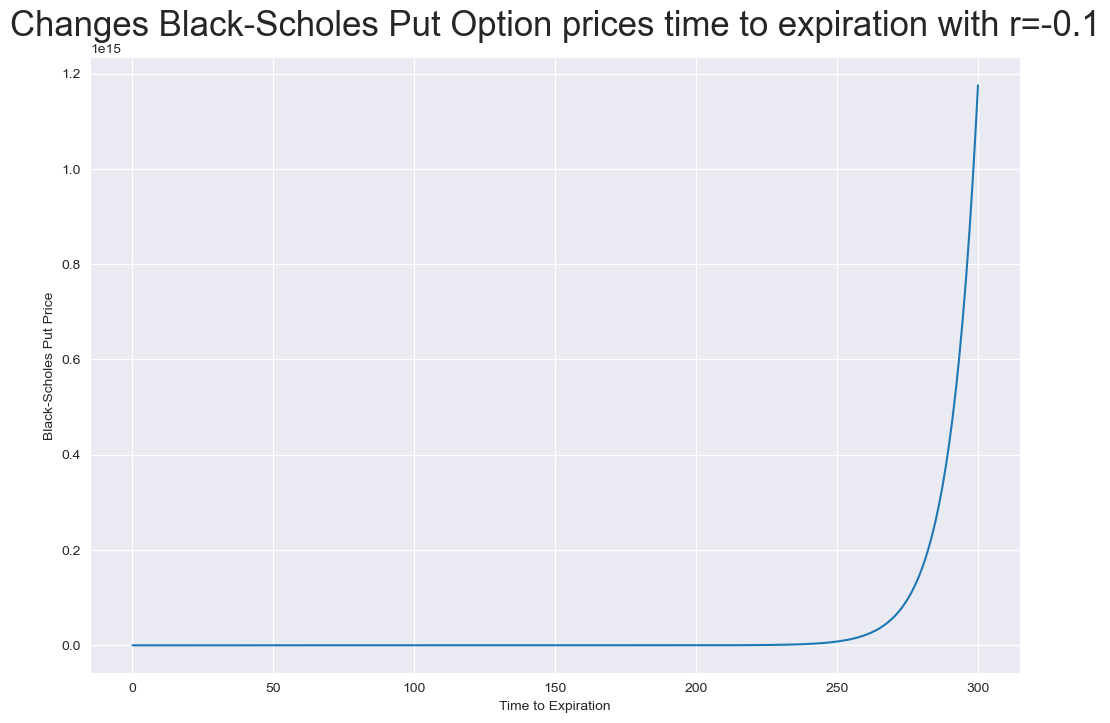

In [334]:
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12,300,500)


for r in [0.,0.04,0.1,-0.04,-0.1]:

    put_prices = [bs_put(S0,K,sigma, t = times[i],r=r) for i in range(len(times))]

    plt.figure(figsize = (12,8))
    plt.title(f'Changes Black-Scholes Put Option prices time to expiration with r={r}', size = 25)
    plt.plot(times, put_prices)
    plt.xlabel('Time to Expiration')
    plt.ylabel('Black-Scholes Put Price')


plt.show()

### As we can see, at $r=0$, the behavior is the same with the call options literally because $\frac{\partial P_{0}}{\partial t}=\frac{\partial C_{0}}{\partial t}$ at $r=0$. The behavior is quite different with that of call options at nonzero $r$. From the plots above for $t\in[1/12,300]$, we see that when $r>0$, the rate of change will first decrease to negative values and then increase to zero; While for $r<0$, the rate of change will keep increasing.

Again, let us directly look at $\frac{\partial P_{0}}{\partial t}=\frac{S_0\varphi(d_1)\sigma}{2\sqrt{t}} - rKe^{-rt}\Phi(-d_2)$. As $t$ goes to infinity, when $r>0$, $\frac{\partial P_{0}}{\partial t}$ goes to zero; when $r<0$, the first term of $\frac{\partial P_{0}}{\partial t}$ goes to zero but the second term will diverge exponentially. As $t$ goes to zero, $\frac{\partial P_{0}}{\partial t}$ goes to zero ($-rK$) for the in-the-money (out-of-the-money) put options. With the observation in the above plots, I guess that when $r>0$, $\frac{\partial P_{0}}{\partial t}$ will first increase and then decrease to negative values and then increase back to zero, while when $r<0$, $\frac{\partial P_{0}}{\partial t}$ will first increase and then decrease and then increase to infinity. These guesses are supported by the following plots of $\frac{\partial P_{0}}{\partial t}$.

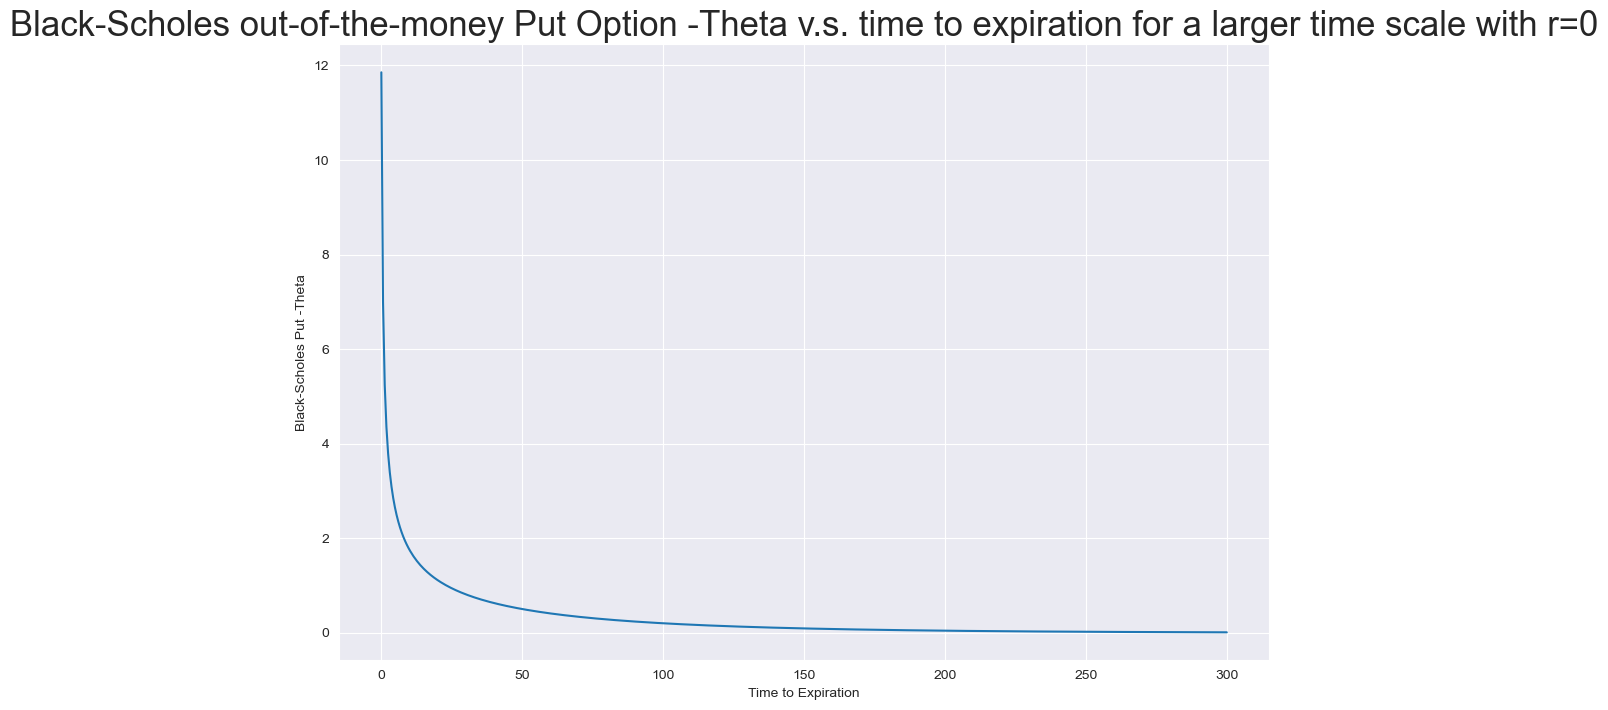

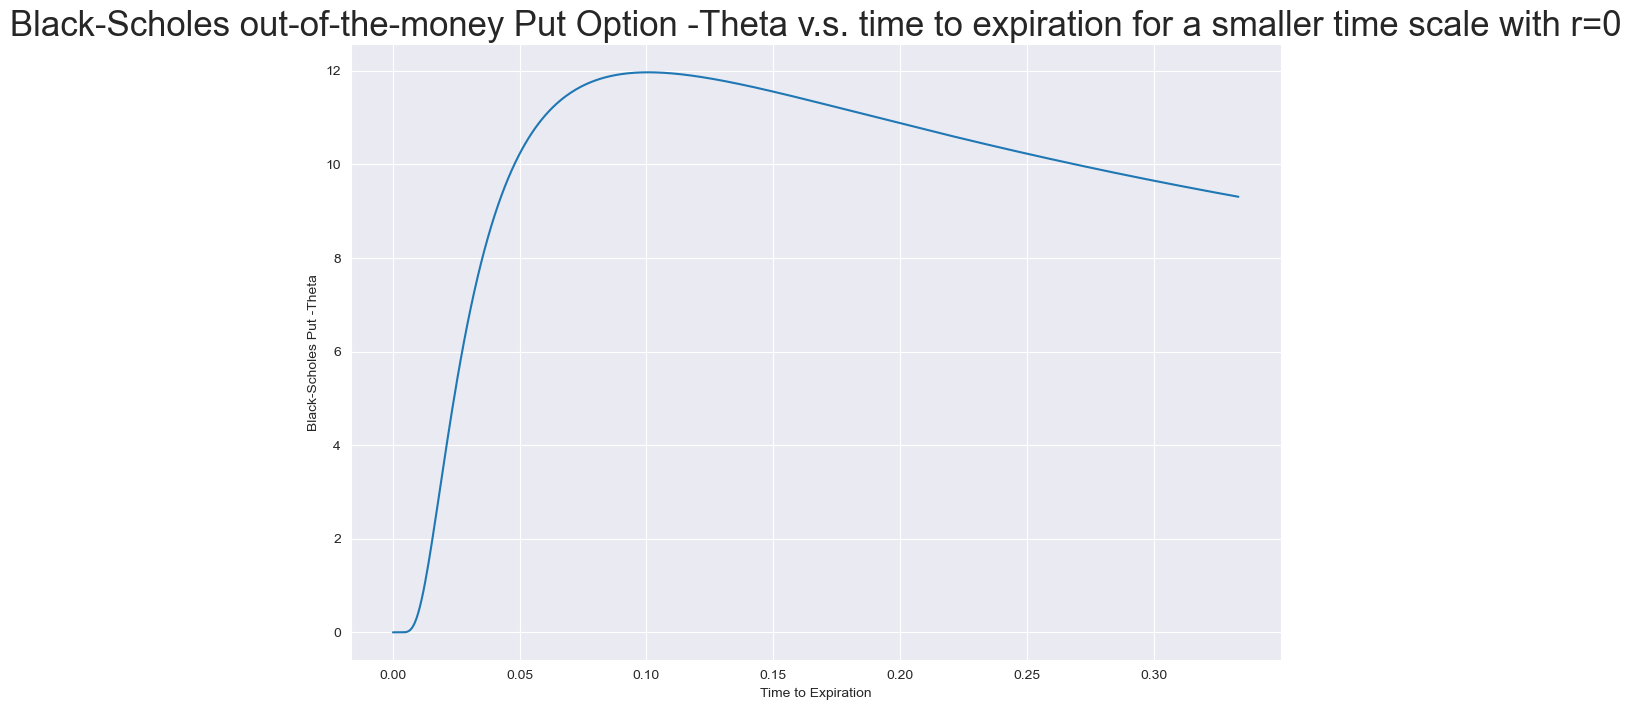

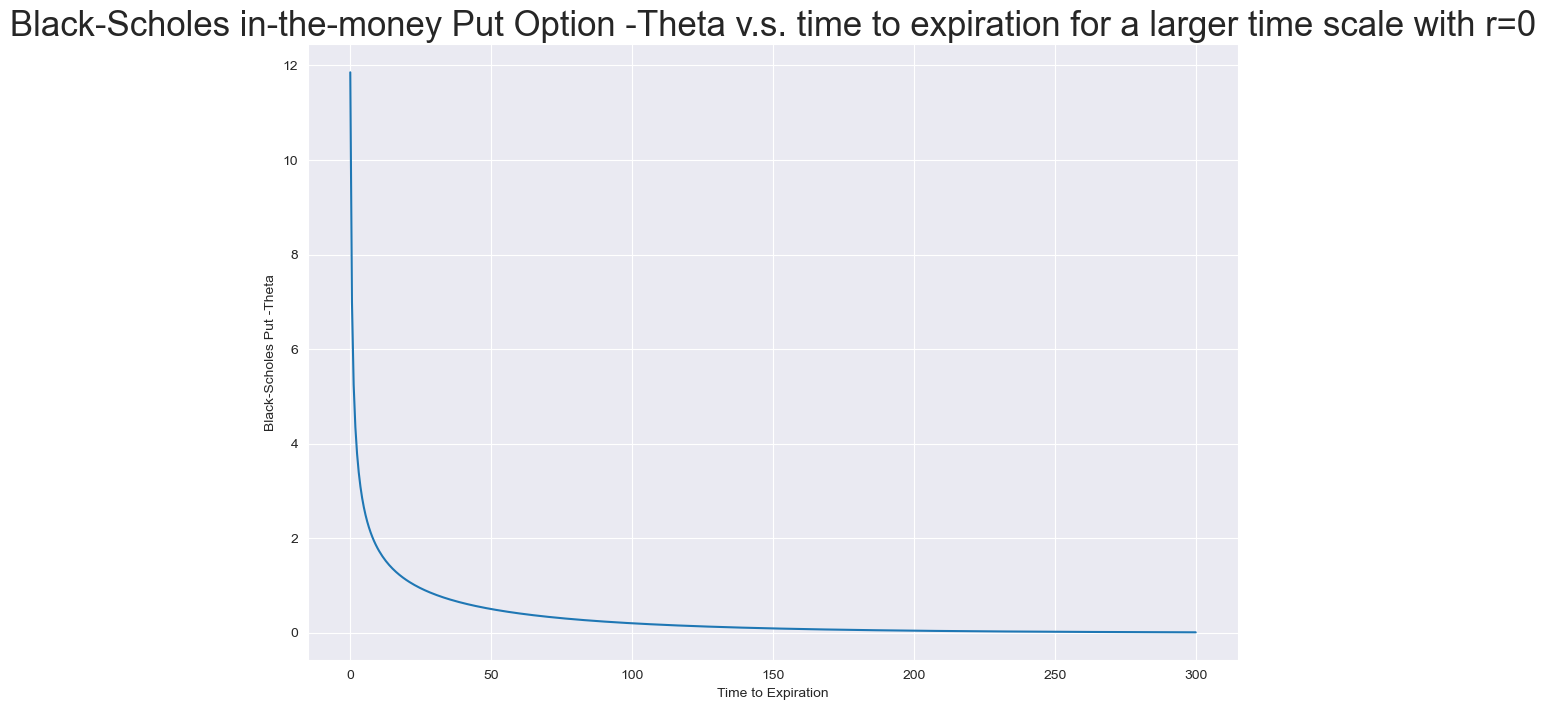

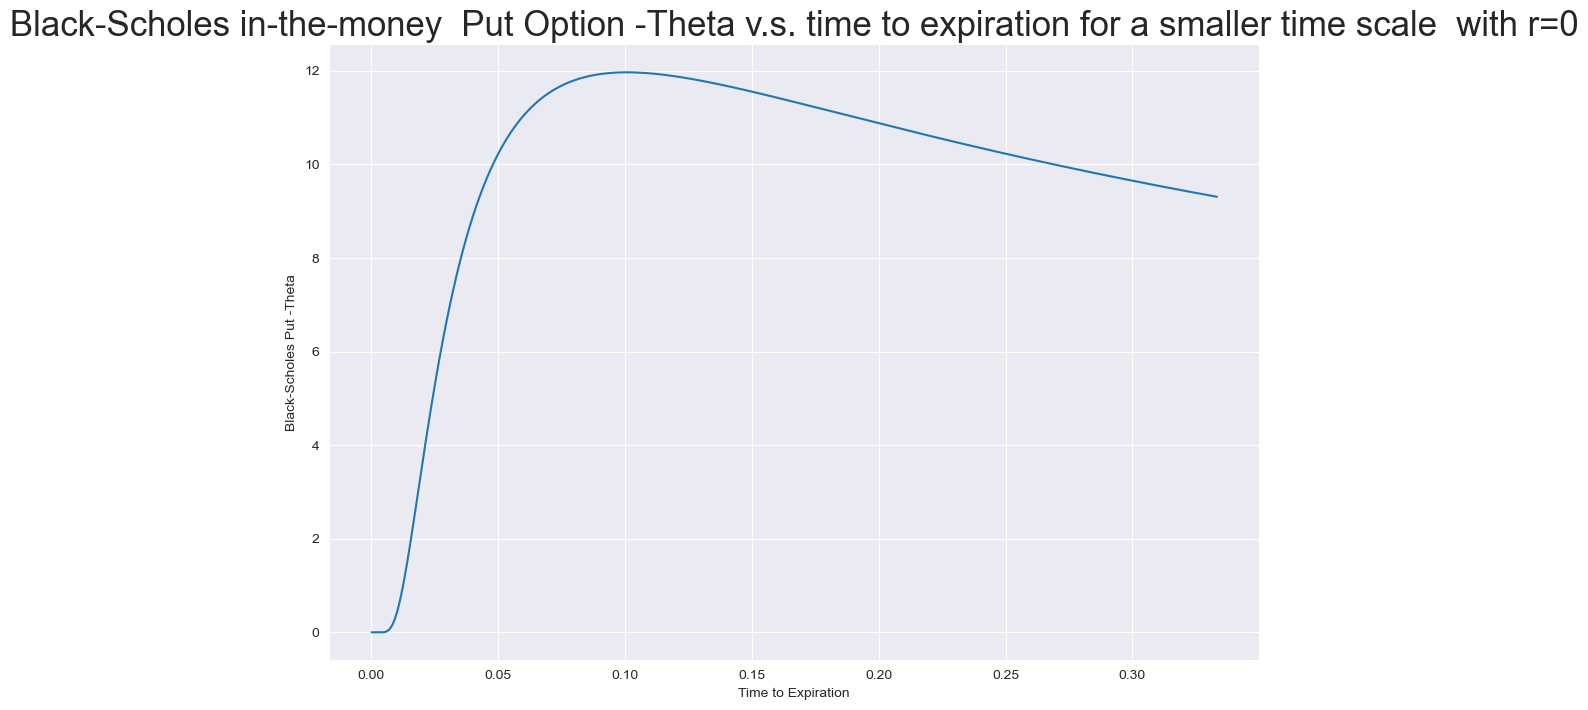

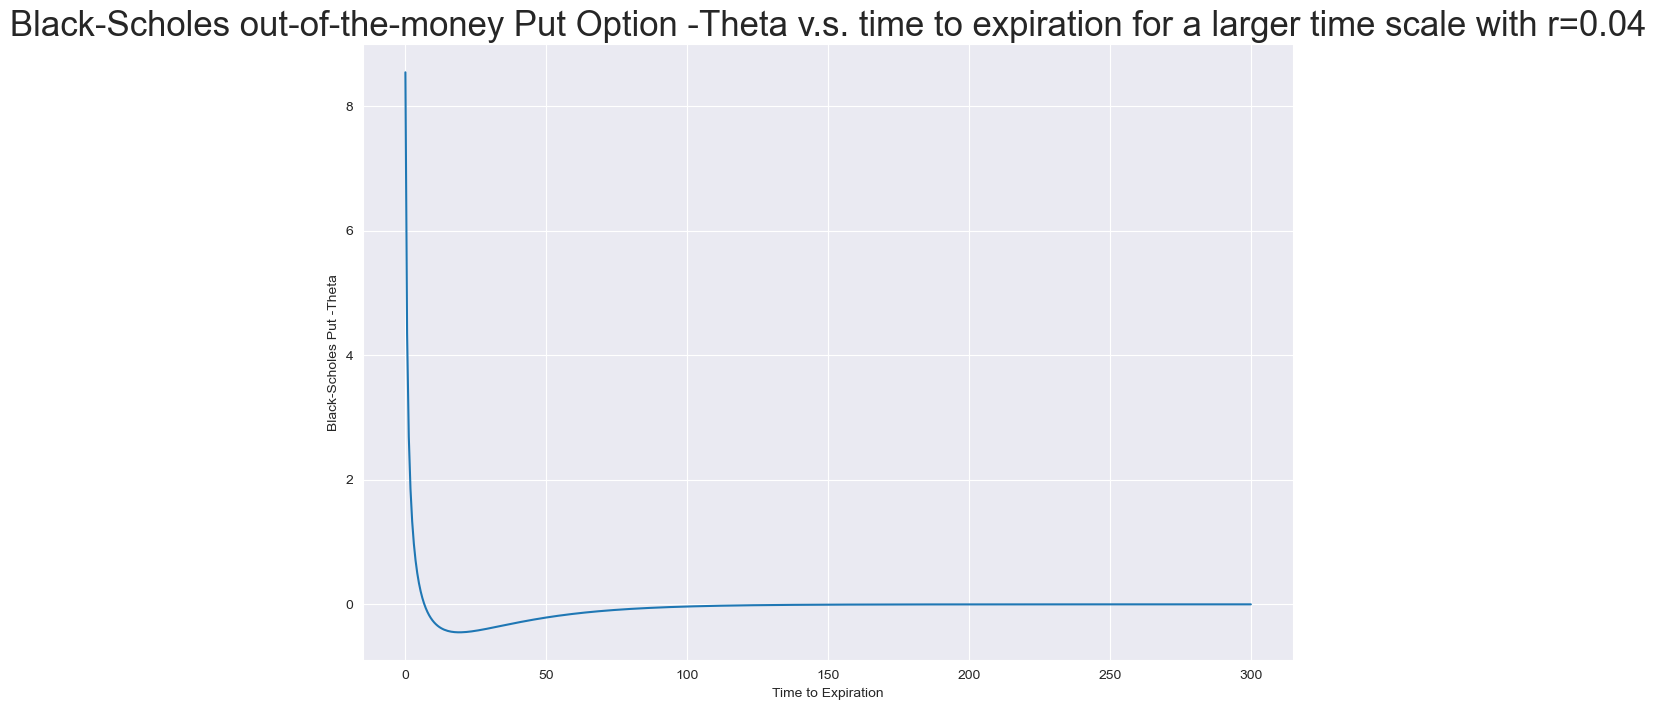

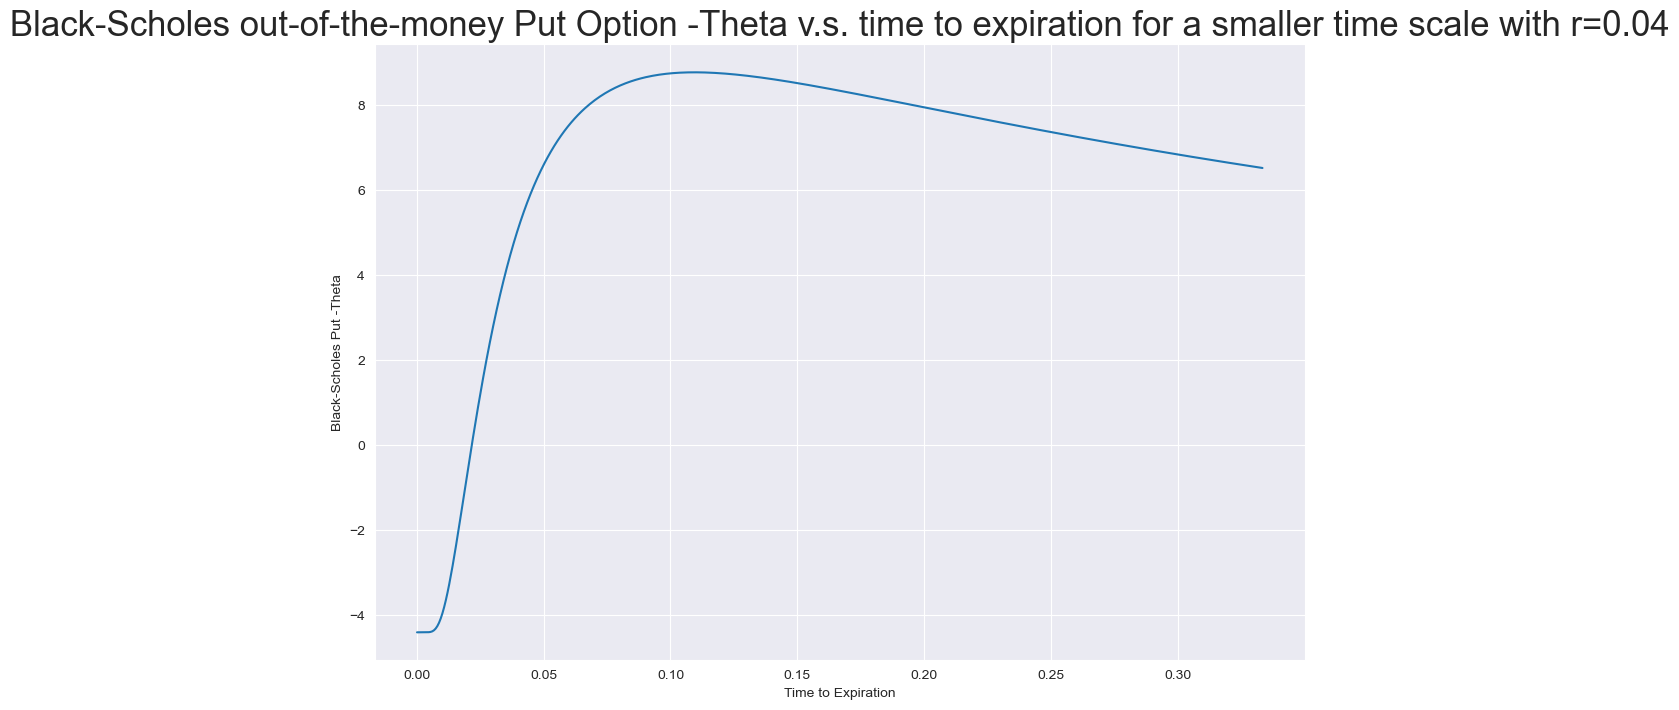

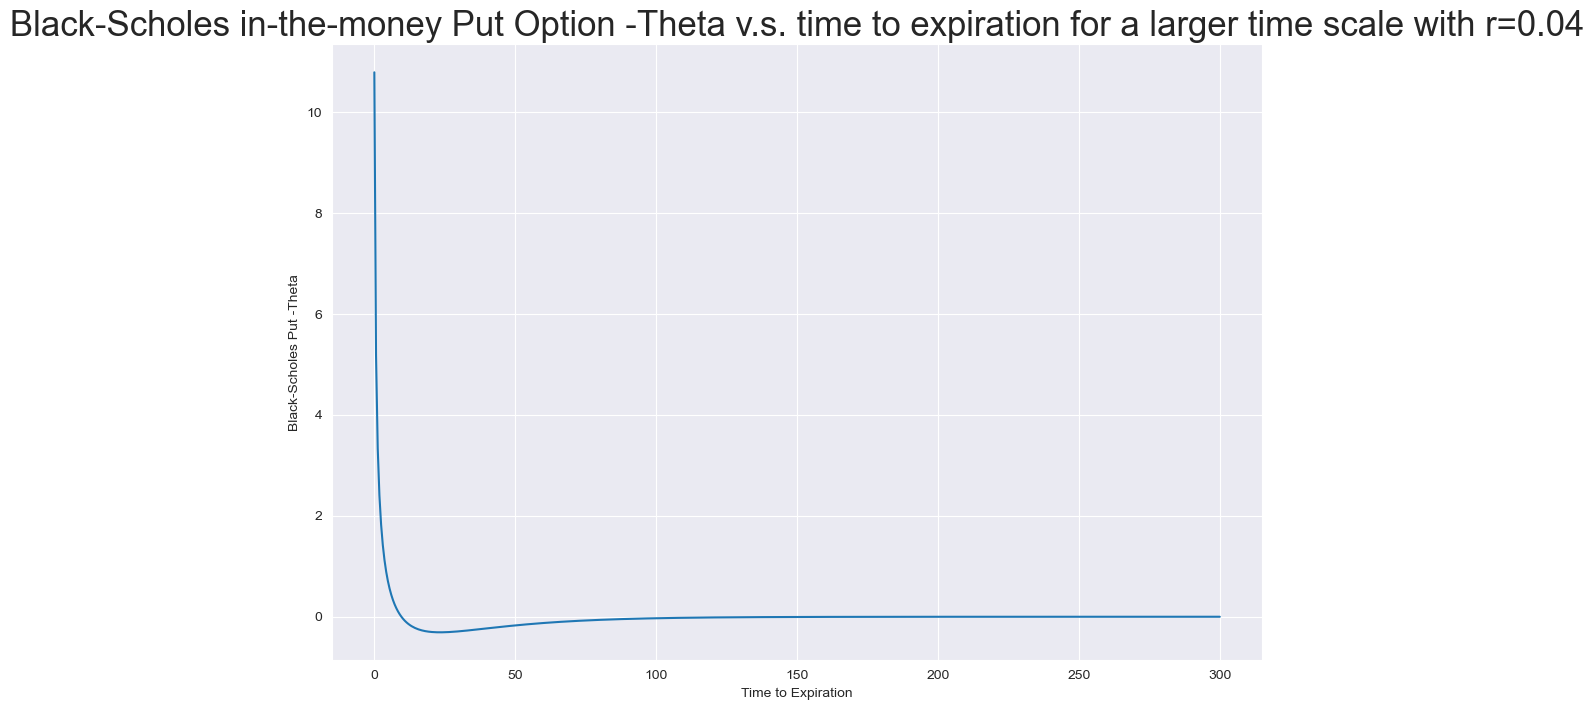

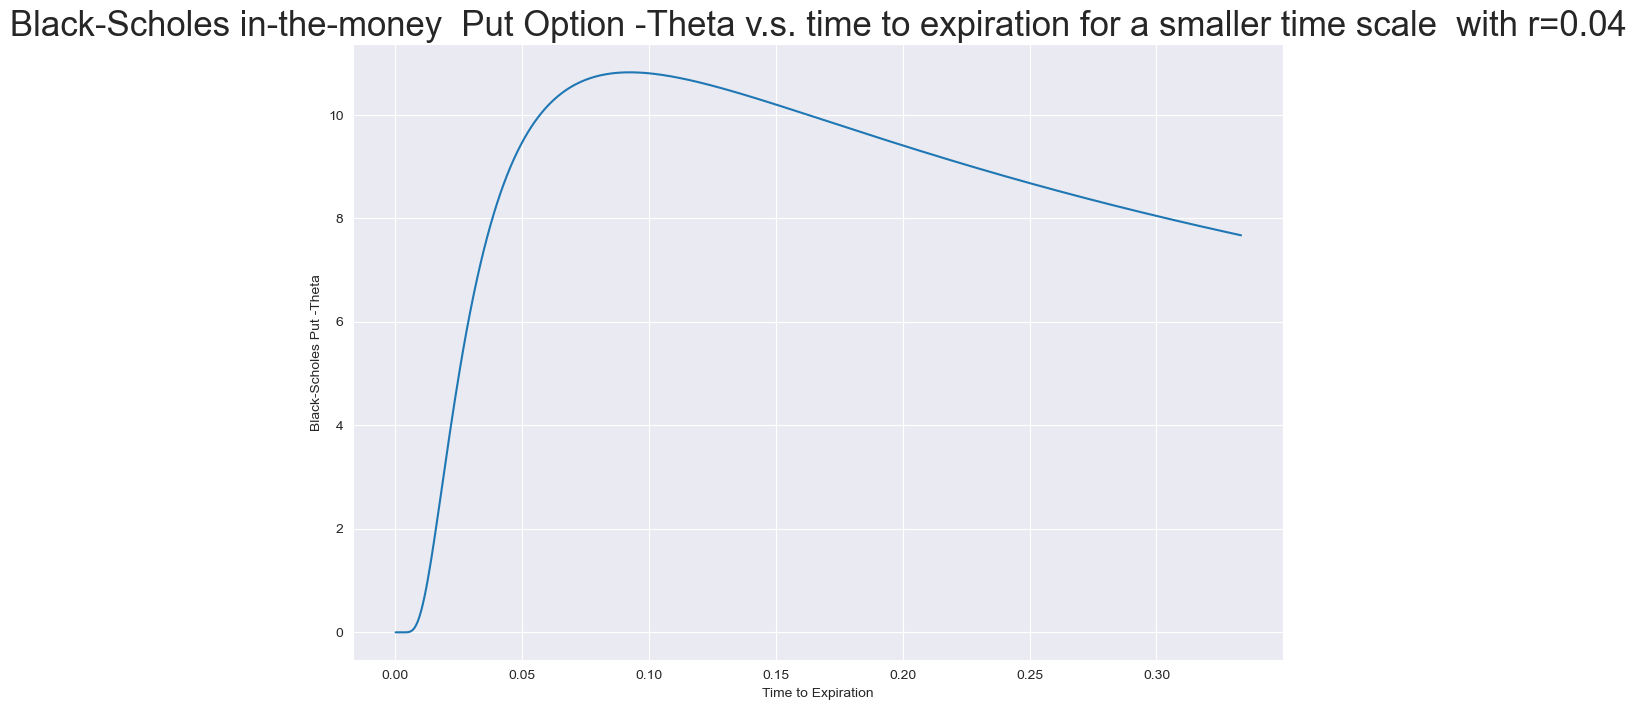

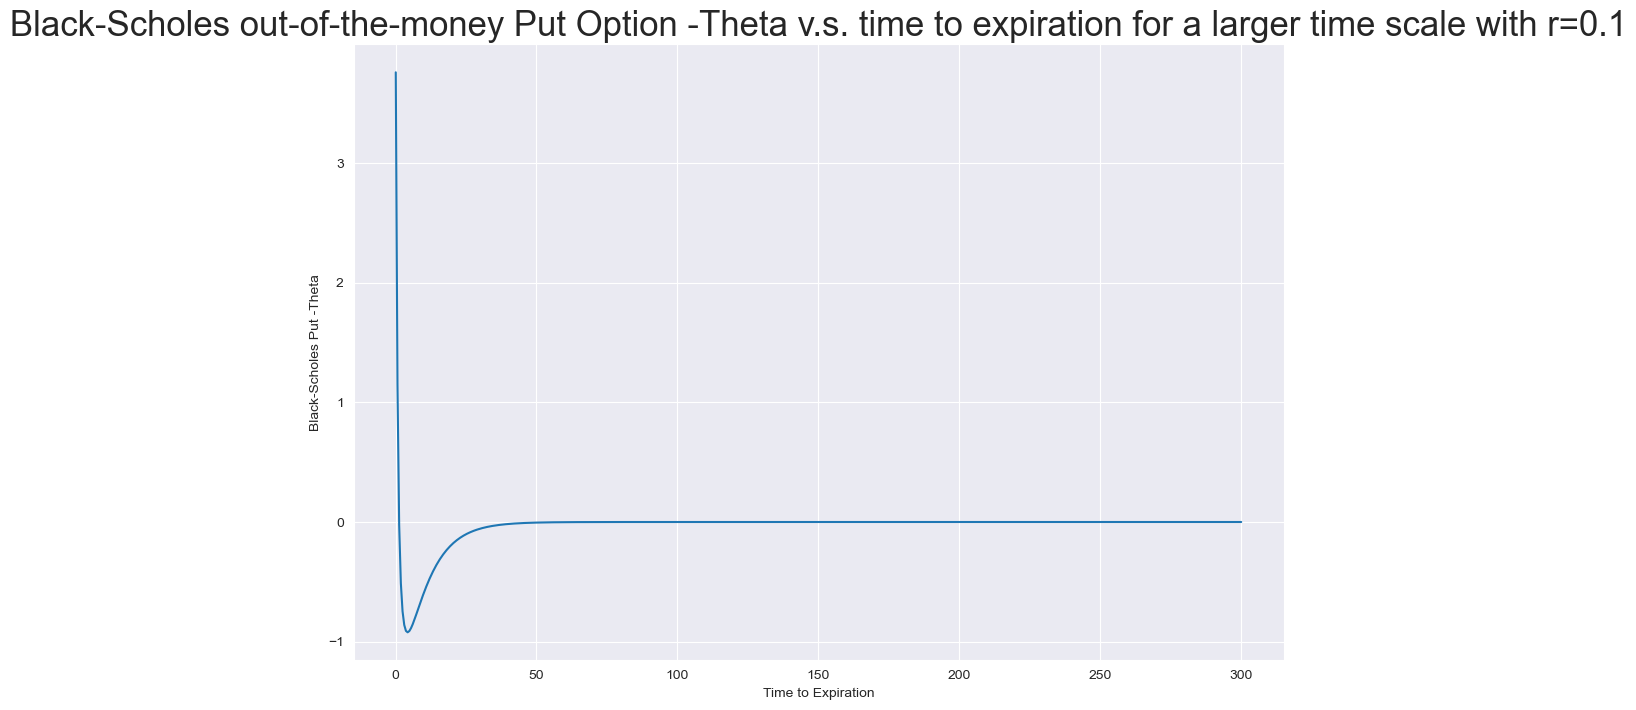

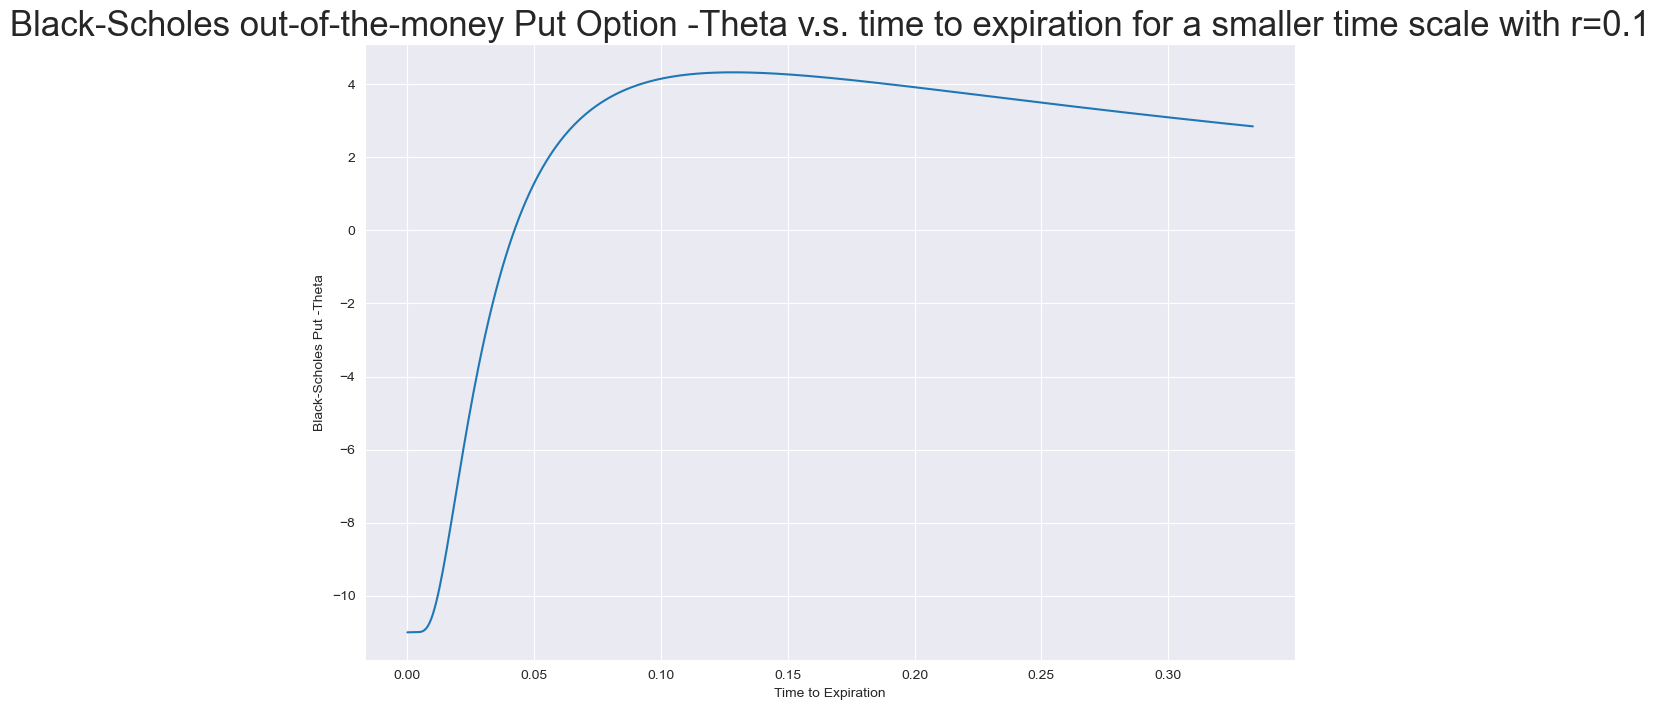

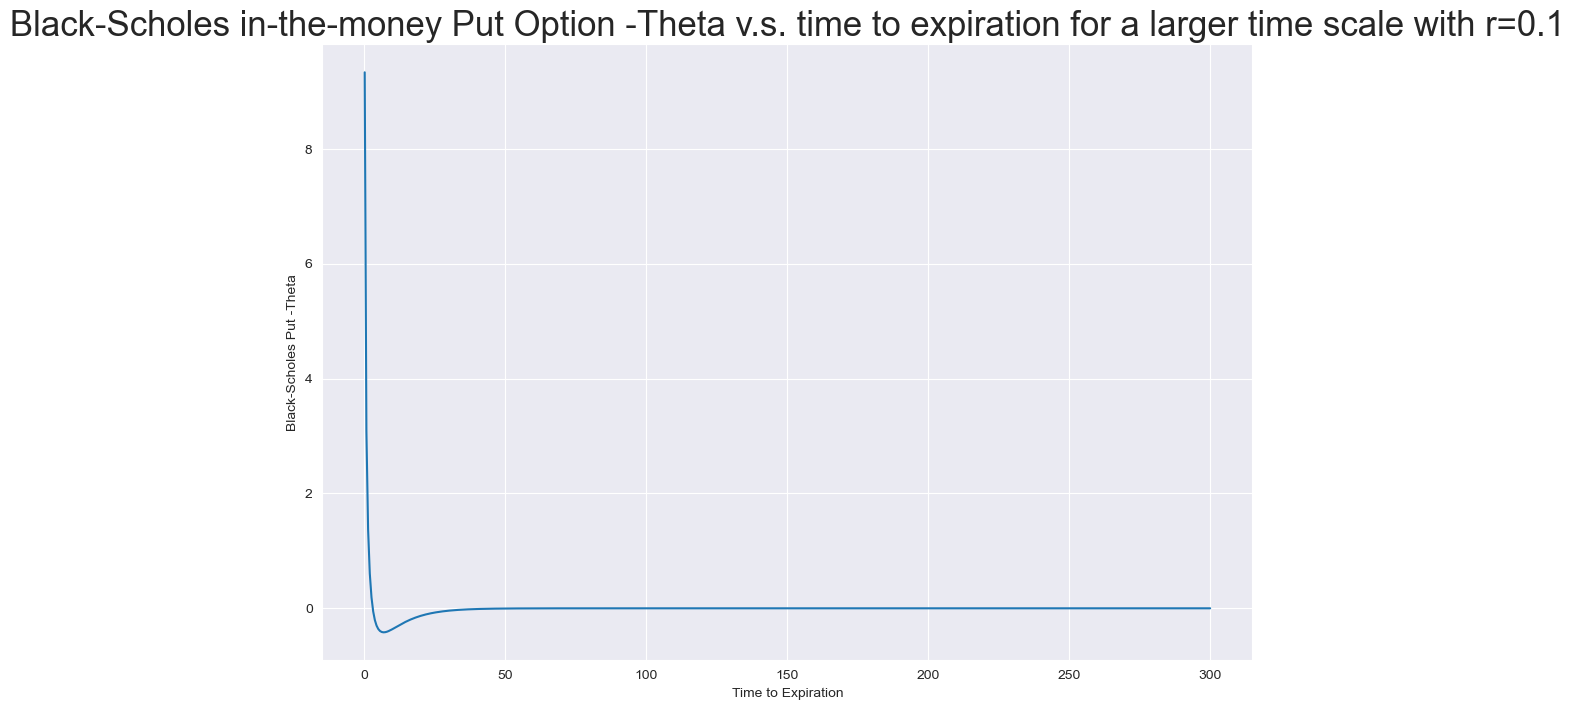

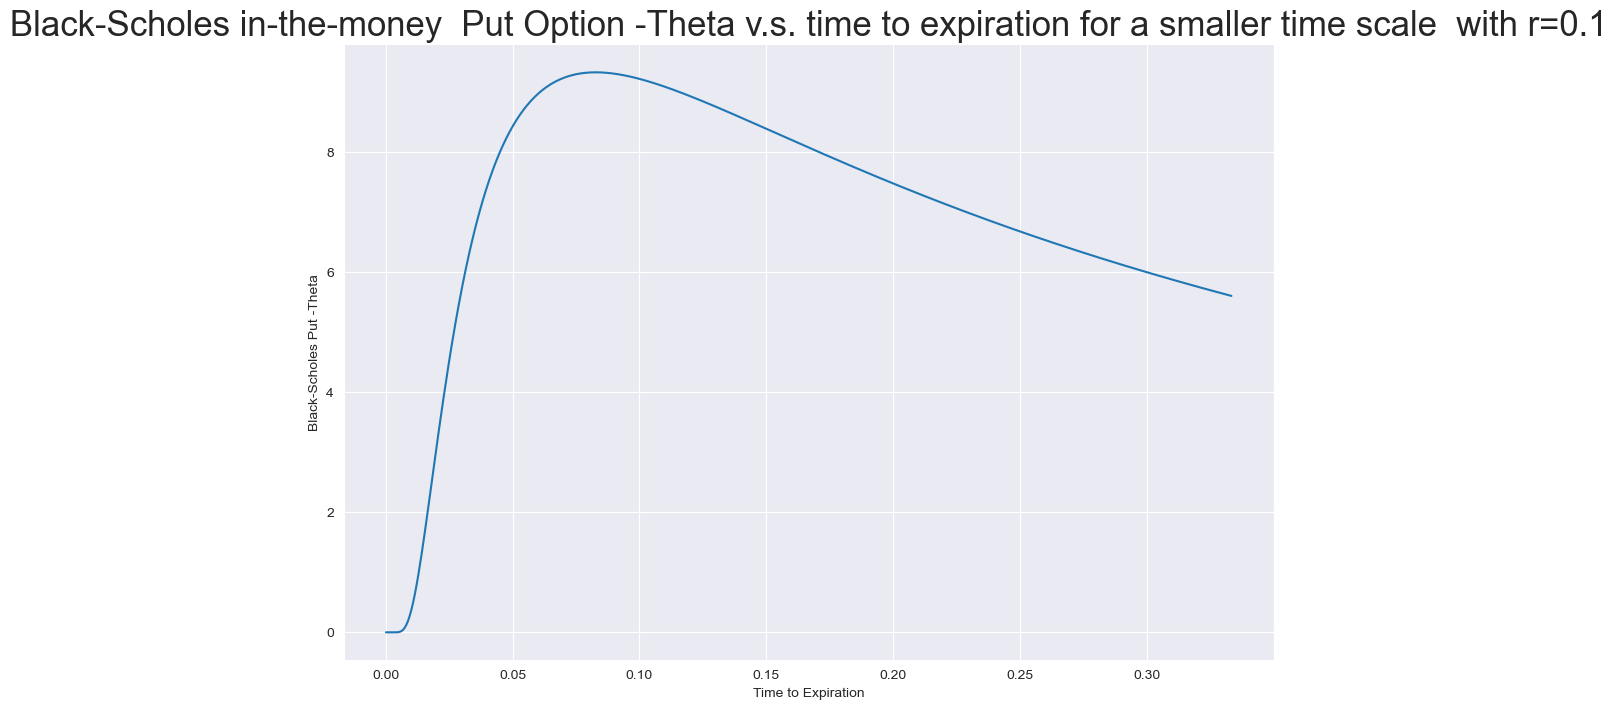

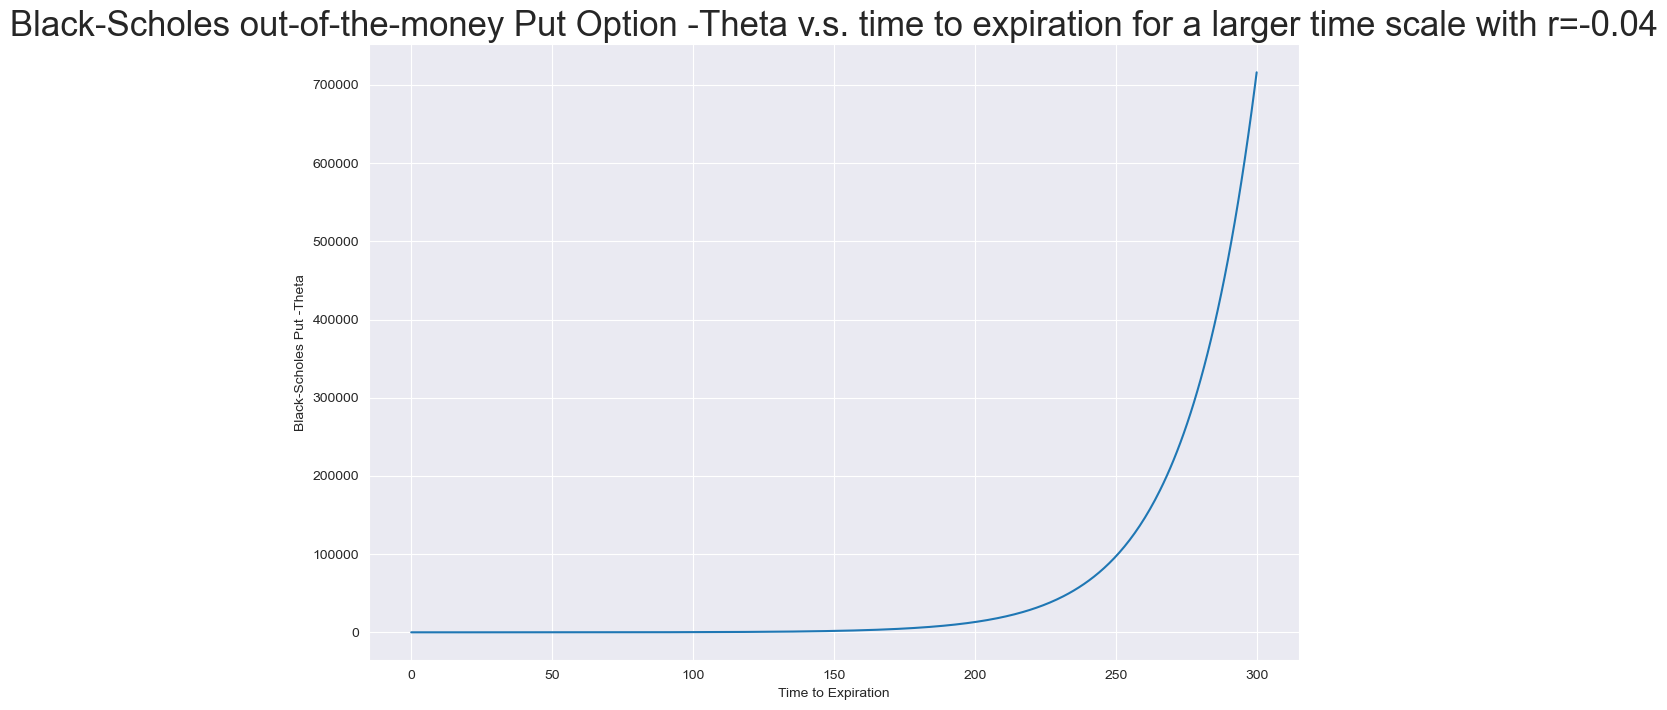

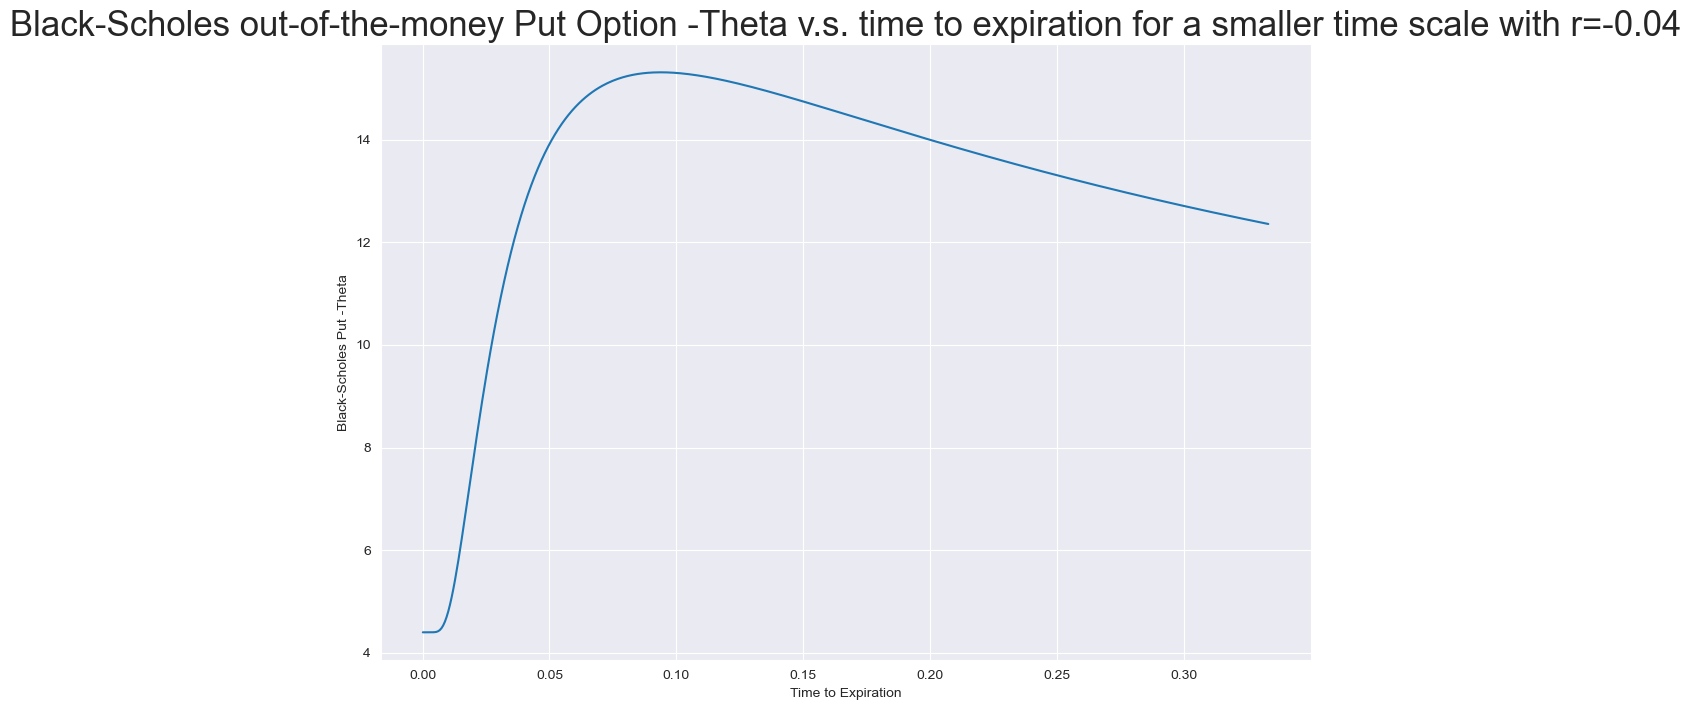

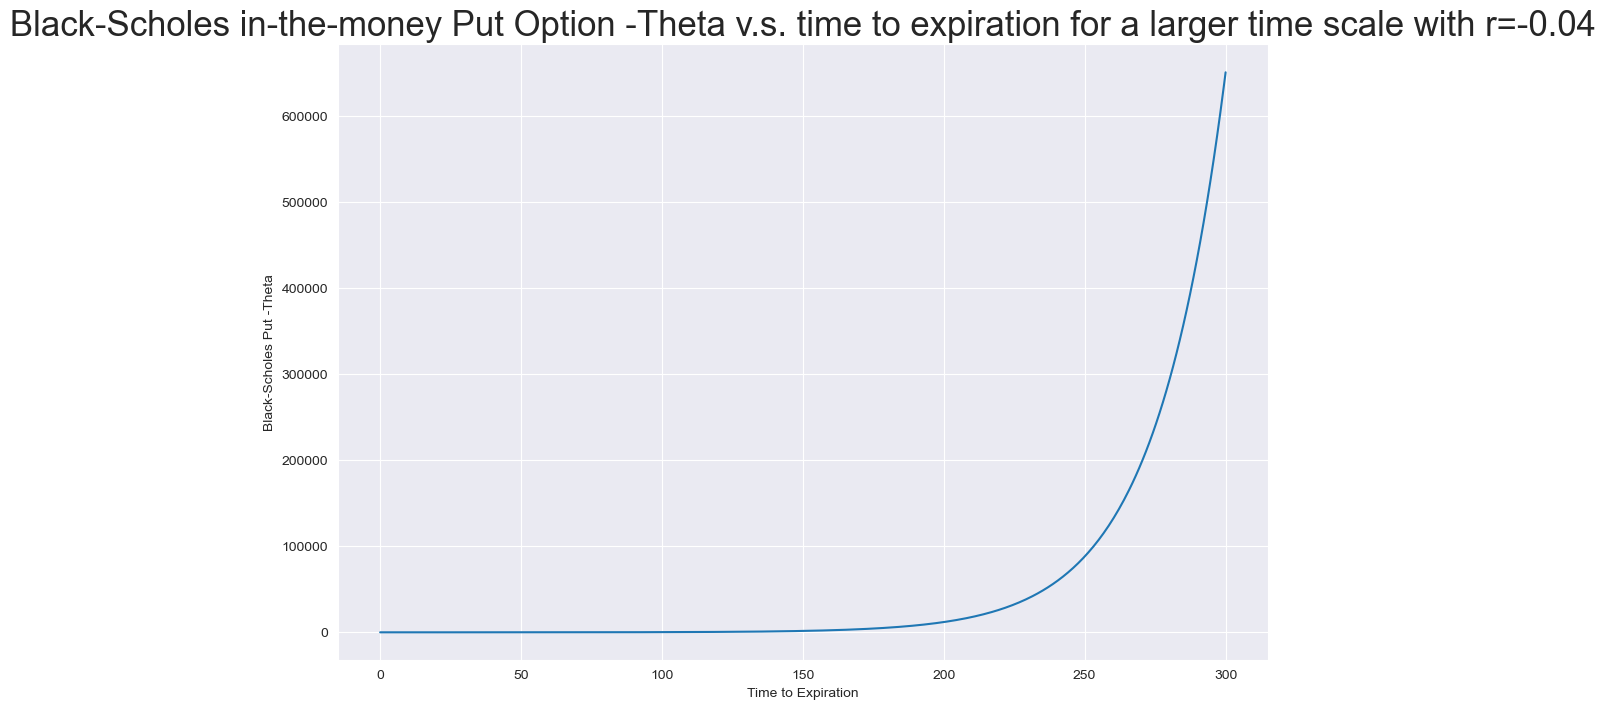

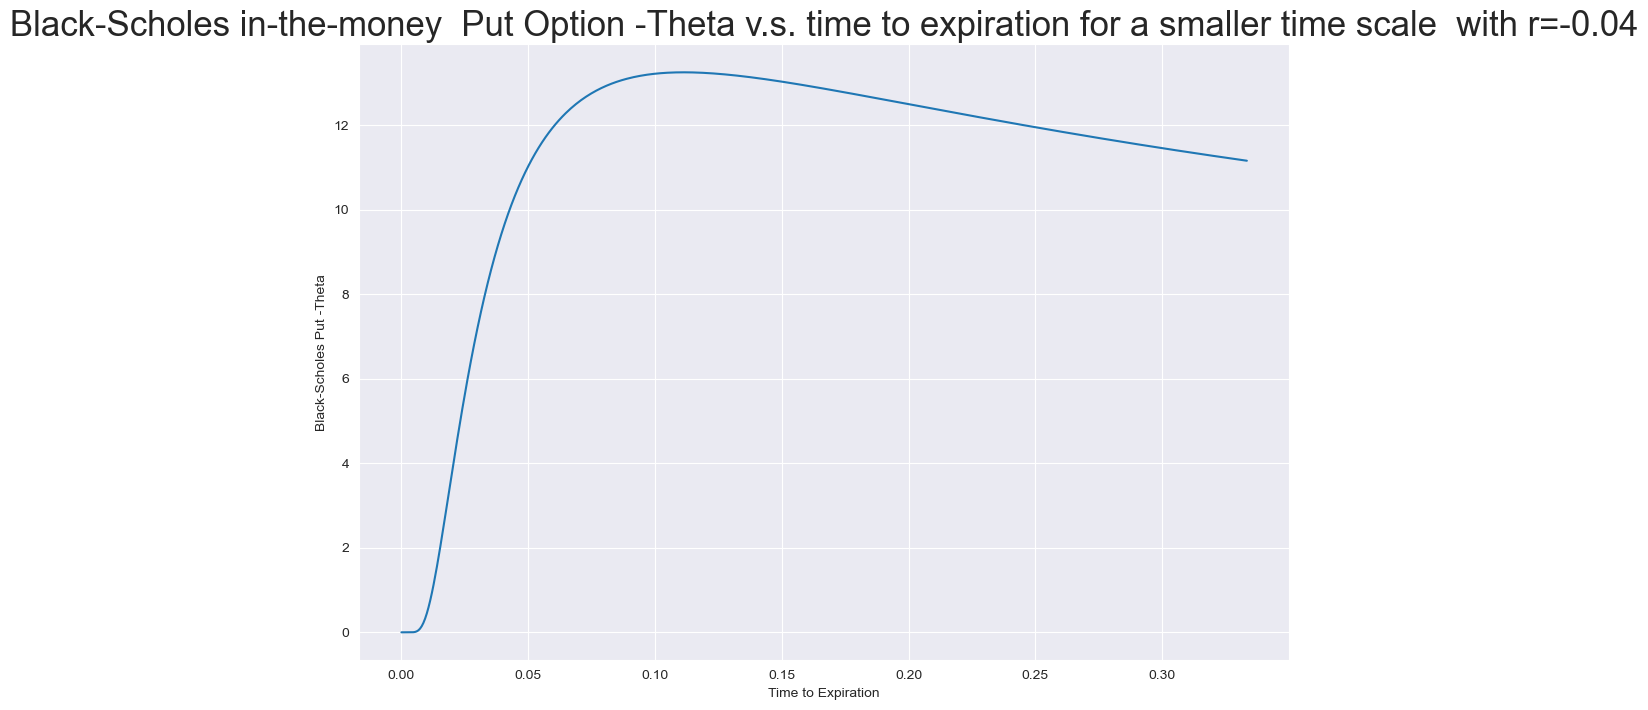

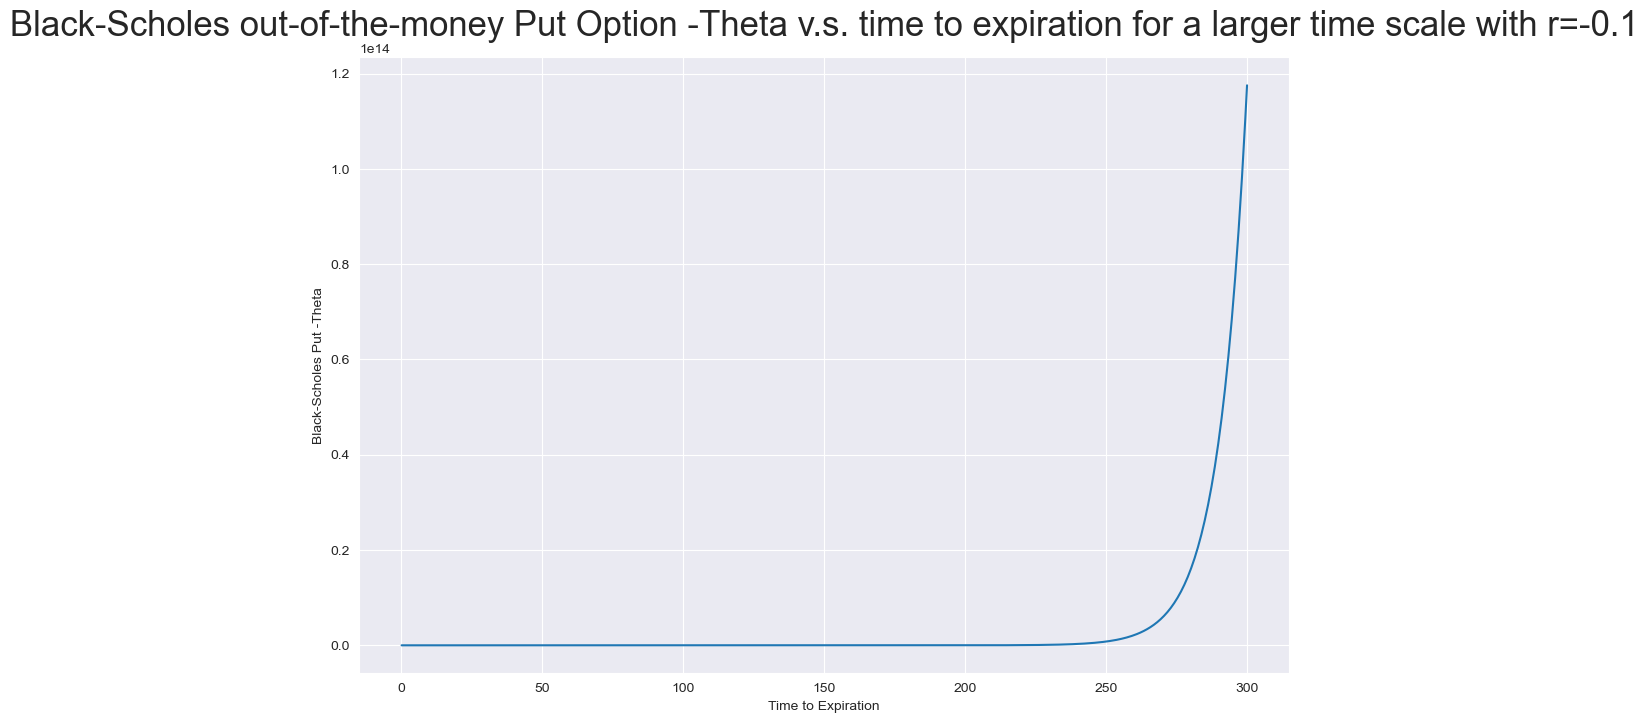

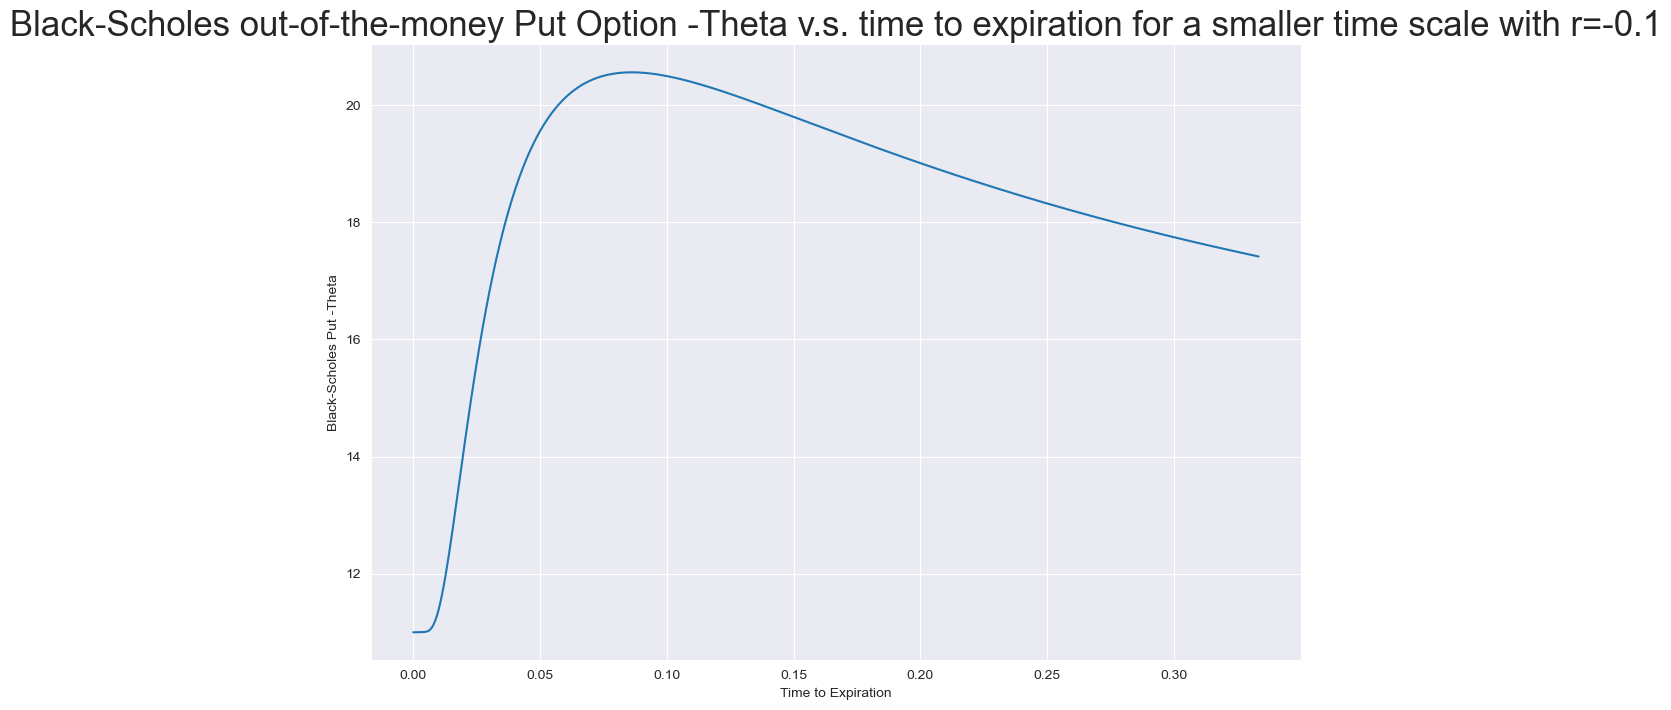

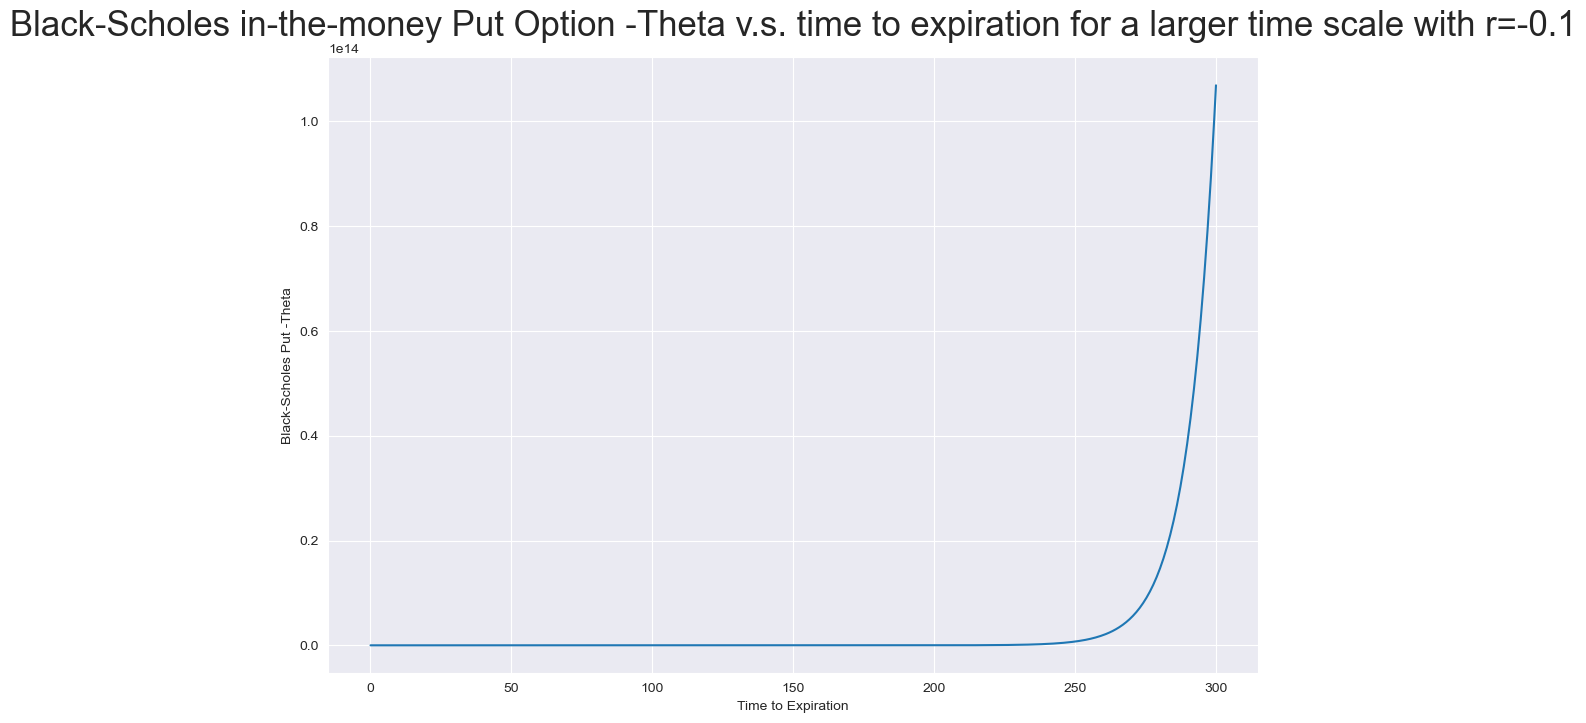

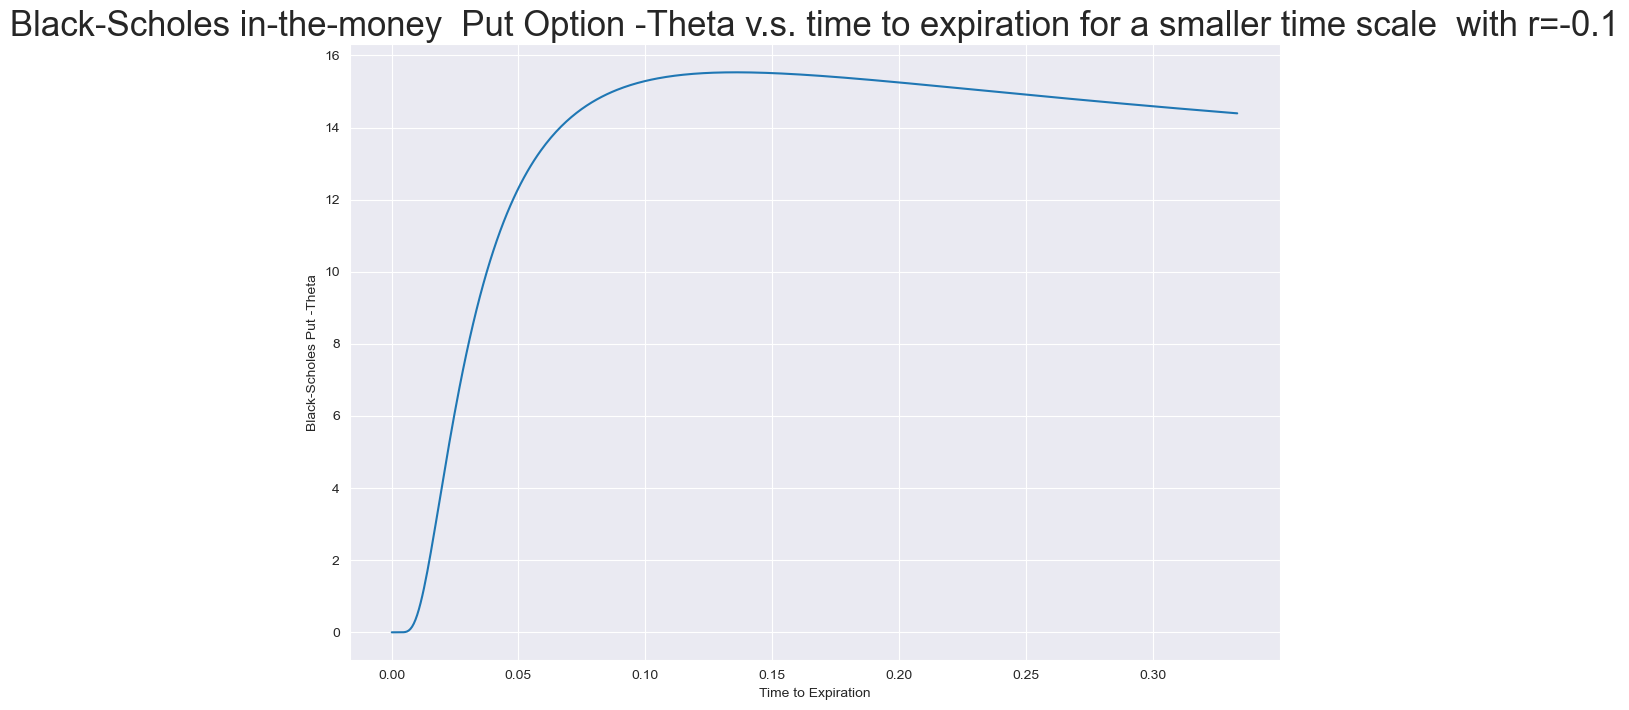

In [347]:
def bs_put_theta(S0,K,sigma,t,r):
    """
    Returns the theta (rate of change with respect to time) of a European put option
    under Black-Scholes assumptions.
    
    
    To give daily theta, divide return by 252.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Theta of Put option
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    
    return (-S0*norm.pdf(d1)*sigma)/(2*np.sqrt(t)) + r*K*np.exp(-r*t)*norm.cdf(-d2)
    

sigma = .3
times = np.linspace(1/12, 300, 500)
times_small_scale=np.linspace(0.0001, 1/3, 500)

for r in [0,0.04,0.1,-0.04,-0.1]:
# out-of-the-money (S0<K)
    S0 = 100
    K = 110
    put_theta = [-bs_put_theta(S0,K,sigma, t = times[i],r=r) for i in range(len(times))]
    put_theta_small_scale = [-bs_put_theta(S0,K,sigma, t = times_small_scale[i],r=r) for i in range(len(times_small_scale))]
# call_theta_with_r = [-bs_call_theta(S0,K,sigma, t = times[i],r=0.04) for i in range(len(times))]
# call_theta_small_scale_with_r = [-bs_call_theta(S0,K,sigma, t = times_small_scale[i],r=0.04) for i in range(len(times_small_scale))]

# in-the-money (S0>K)
    S0 = 110
    K = 100
    put_theta1 = [-bs_put_theta(S0,K,sigma, t = times[i],r=r) for i in range(len(times))]
    put_theta_small_scale1 = [-bs_put_theta(S0,K,sigma, t = times_small_scale[i],r=r) for i in range(len(times_small_scale))]
# call_theta_with_r1 = [-bs_call_theta(S0,K,sigma, t = times[i],r=0.04) for i in range(len(times))]
# call_theta_small_scale_with_r1 = [-bs_call_theta(S0,K,sigma, t = times_small_scale[i],r=0.04) for i in range(len(times_small_scale))]



    plt.figure(figsize = (12,8))
    plt.title(f'Black-Scholes out-of-the-money Put Option -Theta v.s. time to expiration for a larger time scale with r={r}', size = 25)
    plt.plot(times, put_theta)
    plt.xlabel('Time to Expiration')
    plt.ylabel('Black-Scholes Put -Theta')

    plt.figure(figsize = (12,8))
    plt.title(f'Black-Scholes out-of-the-money Put Option -Theta v.s. time to expiration for a smaller time scale with r={r}', size = 25)
    plt.plot(times_small_scale, put_theta_small_scale)
    plt.xlabel('Time to Expiration')
    plt.ylabel('Black-Scholes Put -Theta')

    plt.figure(figsize = (12,8))
    plt.title(f'Black-Scholes in-the-money Put Option -Theta v.s. time to expiration for a larger time scale with r={r}', size = 25)
    plt.plot(times, put_theta1)
    plt.xlabel('Time to Expiration')
    plt.ylabel('Black-Scholes Put -Theta')

    plt.figure(figsize = (12,8))
    plt.title(f'Black-Scholes in-the-money  Put Option -Theta v.s. time to expiration for a smaller time scale  with r={r}', size = 25)
    plt.plot(times_small_scale, put_theta_small_scale1)
    plt.xlabel('Time to Expiration')
    plt.ylabel('Black-Scholes Put -Theta')

plt.show()

### For the spot price sensitivity

I will again first plot a 3D figure about $\frac{\partial P_{0}}{\partial t}$ v.s. spot price v.s. time to expiration, and then analytically study $\frac{\partial^2 P_{0}}{\partial t\partial S_{0}}$.

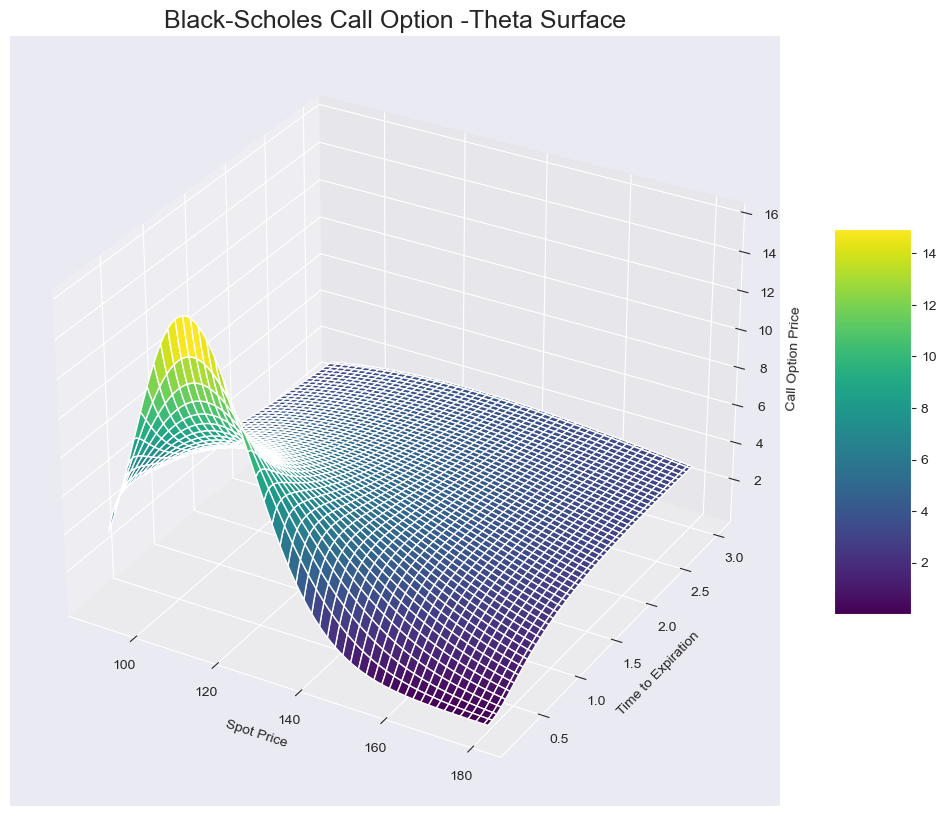

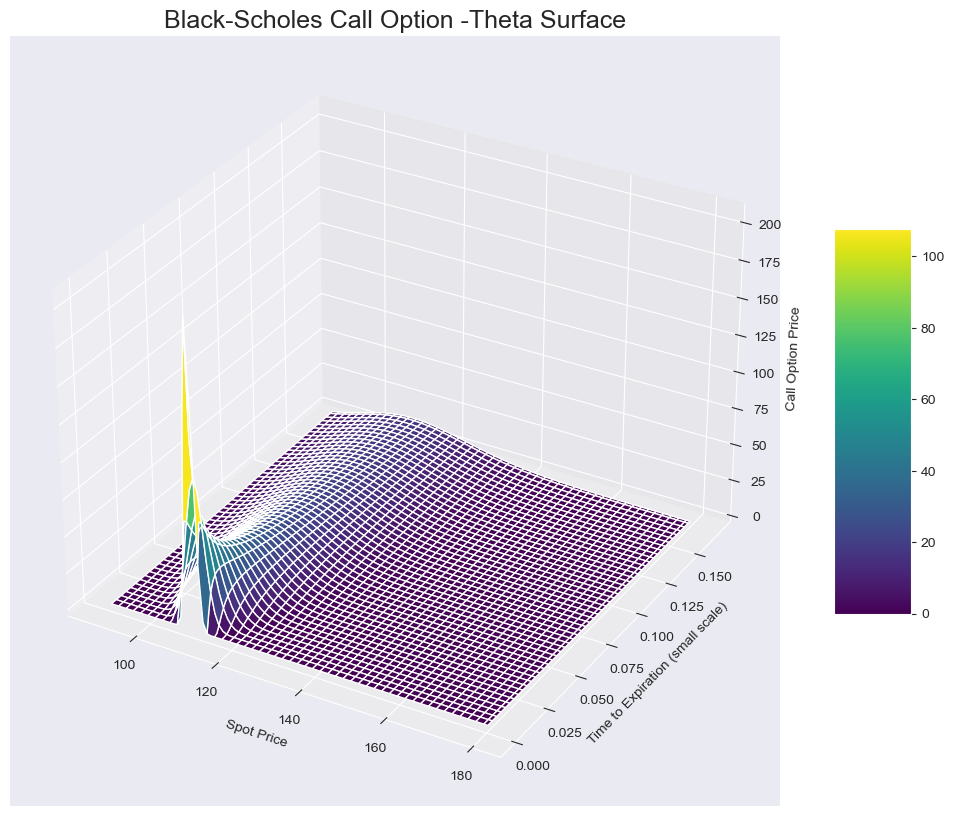

In [357]:
###
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting
from matplotlib import cm  # Color map for surface

    
K = 110
sigma = .3
times = np.linspace(1/6, 3, 100)
times_small_scale=np.linspace(0.001, 1/6, 100)
spotprices=np.linspace(90,180,100)


put_theta = np.array([[-bs_put_theta(S, K, sigma, t=T,r=0) for T in times] for S in spotprices])
put_theta_small_scale = np.array([[-bs_put_theta(S, K, sigma, t=T,r=0) for T in times_small_scale] for S in spotprices])


T, S = np.meshgrid(times, spotprices)

# Plotting
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(S, T, put_theta, cmap=cm.viridis)

ax.set_title('Black-Scholes Call Option -Theta Surface', fontsize=18)
ax.set_ylabel('Time to Expiration')
ax.set_xlabel('Spot Price')
ax.set_zlabel('Call Option Price')

fig.colorbar(surf, shrink=0.5, aspect=5)  


T, S = np.meshgrid(times_small_scale, spotprices)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(S, T, put_theta_small_scale, cmap=cm.viridis)

ax.set_title('Black-Scholes Call Option -Theta Surface', fontsize=18)
ax.set_ylabel('Time to Expiration (small scale)')
ax.set_xlabel('Spot Price')
ax.set_zlabel('Call Option Price')

fig.colorbar(surf, shrink=0.5, aspect=5)  

plt.show()

Same to what happens for call options, the rate of change will first increase and then decrease when the spot price goes from 90 to 180, and the turning point, i.e., location of the maximum of $\frac{\partial C_{0}}{\partial t}$ along the $S_{0}$ axis at a given $t$, is shifting toward larger $S_{0}$ as we increase $t$. Let us now understand this behavior by directly calculate the derivative with respect to $S_0$ of $\frac{\partial P_{0}}{\partial t}$:

$$\frac{\partial}{\partial S_{0}}\frac{\partial P_{0}}{\partial t}=\frac{\varphi(d_1)\sigma}{2\sqrt{t}}+\frac{S_{0}\varphi(d_1)\sigma}{2\sqrt{t}}\frac{\partial (-d^2_{1}/2)}{\partial S_{0}} + rKe^{-rt}\varphi(-d_2)\frac{\partial d_{2}}{\partial S_{0}}$$

Since $\varphi(-d_2)=\varphi(d_2)$, $\frac{\partial}{\partial S_{0}}\frac{\partial P_{0}}{\partial t}$ is exactly identical to $\frac{\partial}{\partial S_{0}}\frac{\partial C_{0}}{\partial t}$:

$$\frac{\partial}{\partial S_{0}}\frac{\partial P_{0}}{\partial t}=\frac{\partial}{\partial C_{0}}\frac{\partial P_{0}}{\partial t}=\frac{\varphi(d_1)\sigma}{2\sqrt{t}}(\sigma-d_1/\sqrt{t}+2r/\sigma),$$

of which the sign is completely determined by $\text{sgn}(\sigma-d_1/\sqrt{t}+2r/\sigma)=\text{sgn}(\sigma^2/2+r-\ln(S_{0}/K)/t)$. That is to say, for a given $t$, the turning point happens at $S_{0}^{TP}=Ke^{(r+\sigma^2/2)t}$. When $S_{0}<S_{0}^{TP}$, rate of change increases as $S_{0}$ increases while when $S_{0}>S_{0}^{TP}$, rate of change decreases as $S_{0}$ increases. The expression for $S_{0}^{TP}$ indeed matches my observation for $r=0$.